<div dir="rtl">

# ברוכים הבאים לפרויקט גמר
    
### לפרויקט שני חלקים 
    
## חלק ראשון:
    
### בחלק הראשון נעסוק בתאונות של עובדים במפעלי צעצועים בסין. 
    
### במפעלים אלו הפועלים עובדים שעות ארוכות עם מכונות מסוכנות והרבה מהם נפצעים במהלך עבודתם. 
    
### בחלק הראשון של הפרויקט נרצה למצוא את ההסתברות לפציעה בשעה מסוימת ביום
    
### יש לנו מספר משתנים מסבירים: 

* age: the worker age (continuous)
* expirience: the number of years the worker is in the factory (continuous)
* hour: the hour of the shift (continous). That is, the first, seconmd
* worker_rank: workers are being ranked by their employer, the higher the rank the more senior the worker is. Ranks are between 0 to 5 (continuous)
* days: day of the week (categorical)
* toys: the type of the toy (categorical)
* factory: the factory location refers to a city in china (categorical)
* month: the month in the year (categorical)

<div dir="rtl">

### 1. להציג scatter plot עבור כל זוג משתנים מסבירים ולחשב קורלציה (r) בין כל זוג. האם יש זוג משתנים שיש בינהם קשר? אם כן, אילו? 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import statsmodels.api as sm
import pickle as pkl
import scipy
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from scipy.stats import chi2
from statsmodels.discrete.discrete_model import NegativeBinomial

In [2]:
df_data = pkl.load(open('C:/Users/נועה/Desktop/ניהול בטיחות למהנדסים/פרויקט/df_task_1_group_1.pkl', 'rb'))

In [3]:
df_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               2000 non-null   int32 
 1   expirience        2000 non-null   int32 
 2   hour              2000 non-null   int32 
 3   worker_rank       2000 non-null   int32 
 4   days_c            2000 non-null   object
 5   toys_c            2000 non-null   object
 6   factories_rand_c  2000 non-null   object
 7   months_c          2000 non-null   object
 8   safety_event      2000 non-null   int64 
dtypes: int32(4), int64(1), object(4)
memory usage: 109.5+ KB


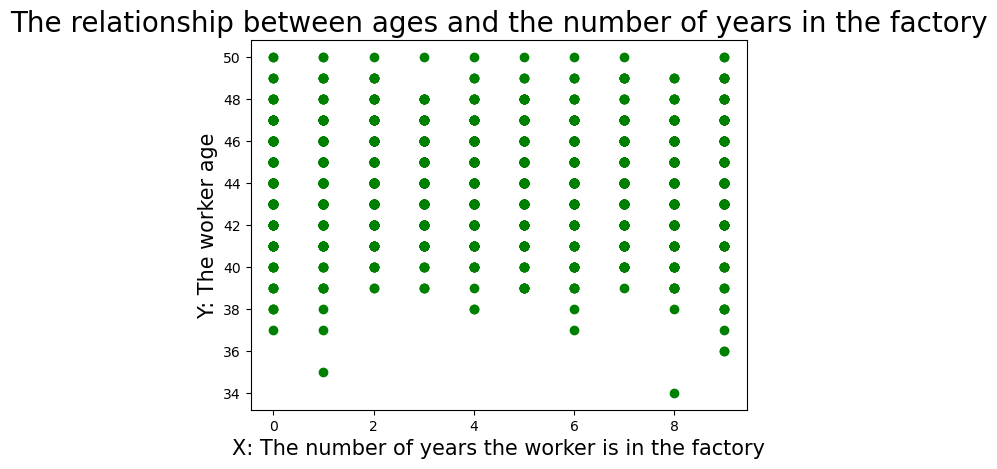

In [4]:
plt.figure()
plt.scatter(df_data["expirience"], df_data["age"], color = 'g')
plt.xlabel('X: The number of years the worker is in the factory', fontsize = 15)
plt.ylabel('Y: The worker age', fontsize = 15)
plt.title('The relationship between ages and the number of years in the factory', fontsize = 20)
plt.show()

In [5]:
df_data['Intercept'] = 1

In [6]:
model = sm.OLS(df_data['age'], df_data[['Intercept', 'expirience']])
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.01383
Date:                Fri, 08 Mar 2024   Prob (F-statistic):              0.906
Time:                        10:27:24   Log-Likelihood:                -4477.0
No. Observations:                2000   AIC:                             8958.
Df Residuals:                    1998   BIC:                             8969.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     44.0919      0.093    476.451      0.0

<div dir="rtl">

##### הקשר בין age ל- expirience הוא $R^2 = 0.000$

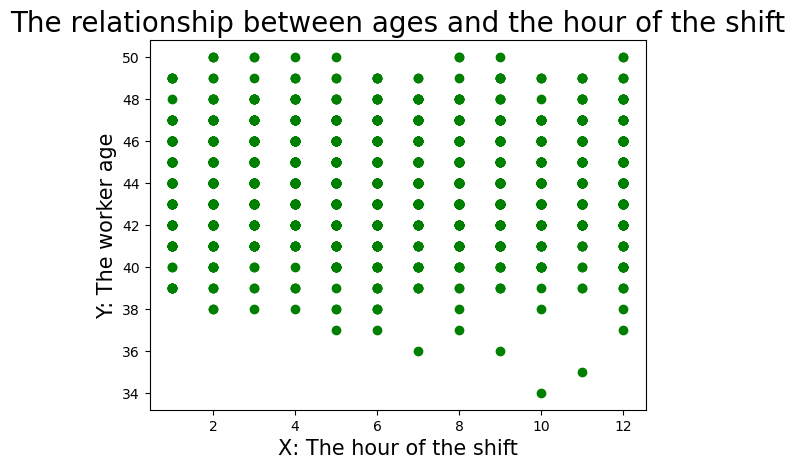

In [7]:
plt.figure()
plt.scatter(df_data["hour"], df_data["age"], color = 'g')
plt.xlabel('X: The hour of the shift', fontsize = 15)
plt.ylabel('Y: The worker age', fontsize = 15)
plt.title('The relationship between ages and the hour of the shift', fontsize = 20)
plt.show()

In [8]:
model1 = sm.OLS(df_data['age'], df_data.loc[:, ['Intercept', 'hour']])
results1 = model1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.01521
Date:                Fri, 08 Mar 2024   Prob (F-statistic):              0.902
Time:                        10:27:25   Log-Likelihood:                -4477.0
No. Observations:                2000   AIC:                             8958.
Df Residuals:                    1998   BIC:                             8969.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     44.0893      0.107    410.210      0.0

<div dir="rtl">

##### הקשר בין age ל- hour הוא $R^2 = 0.000$

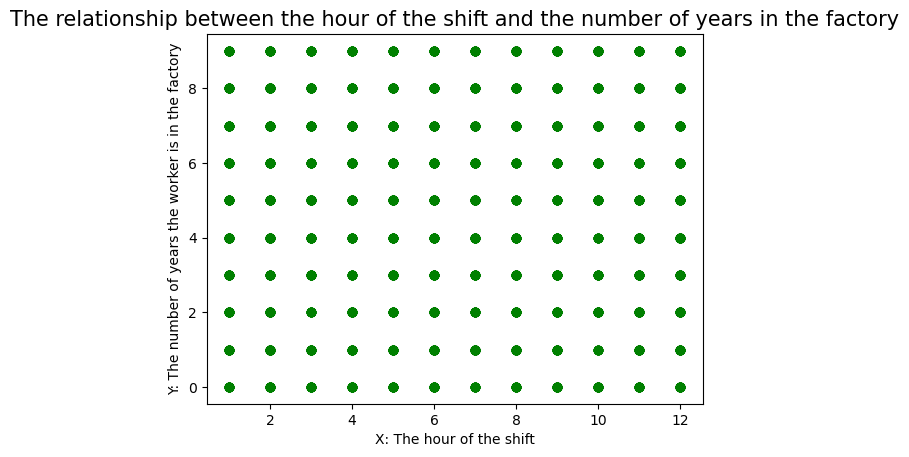

In [9]:
plt.figure()
plt.scatter(df_data["hour"], df_data["expirience"], color = 'g')
plt.xlabel('X: The hour of the shift', fontsize = 10)
plt.ylabel('Y: The number of years the worker is in the factory', fontsize = 10)
plt.title('The relationship between the hour of the shift and the number of years in the factory', fontsize = 15)
plt.show()

In [10]:
model2 = sm.OLS(df_data['expirience'], df_data.loc[:, ['Intercept', 'hour']])
results2 = model2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:             expirience   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                  0.003844
Date:                Fri, 08 Mar 2024   Prob (F-statistic):              0.951
Time:                        10:27:25   Log-Likelihood:                -4968.8
No. Observations:                2000   AIC:                             9942.
Df Residuals:                    1998   BIC:                             9953.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.4150      0.137     32.122      0.0

<div dir="rtl">

##### הקשר בין hour ל- expirience הוא $R^2 = 0.000$

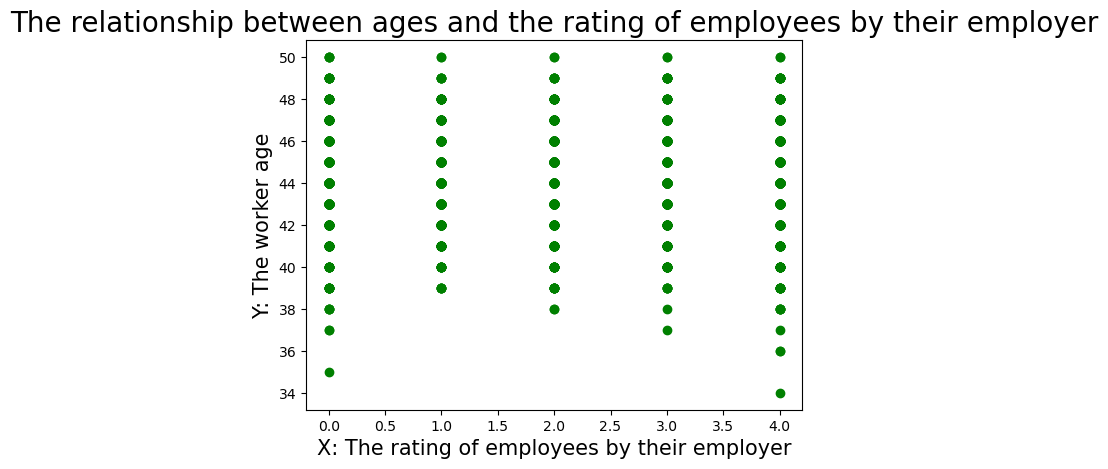

In [11]:
plt.figure()
plt.scatter(df_data["worker_rank"], df_data["age"], color = 'g')
plt.xlabel('X: The rating of employees by their employer', fontsize = 15)
plt.ylabel('Y: The worker age', fontsize = 15)
plt.title('The relationship between ages and the rating of employees by their employer', fontsize = 20)
plt.show()

In [12]:
model = sm.OLS(df_data['age'], df_data[['Intercept', 'worker_rank']])
results3 = model.fit()
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.01172
Date:                Fri, 08 Mar 2024   Prob (F-statistic):              0.914
Time:                        10:27:26   Log-Likelihood:                -4477.0
No. Observations:                2000   AIC:                             8958.
Df Residuals:                    1998   BIC:                             8969.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      44.0935      0.086    512.745      

<div dir="rtl">

##### הקשר בין age ל- worker rank הוא $R^2 = 0.000$

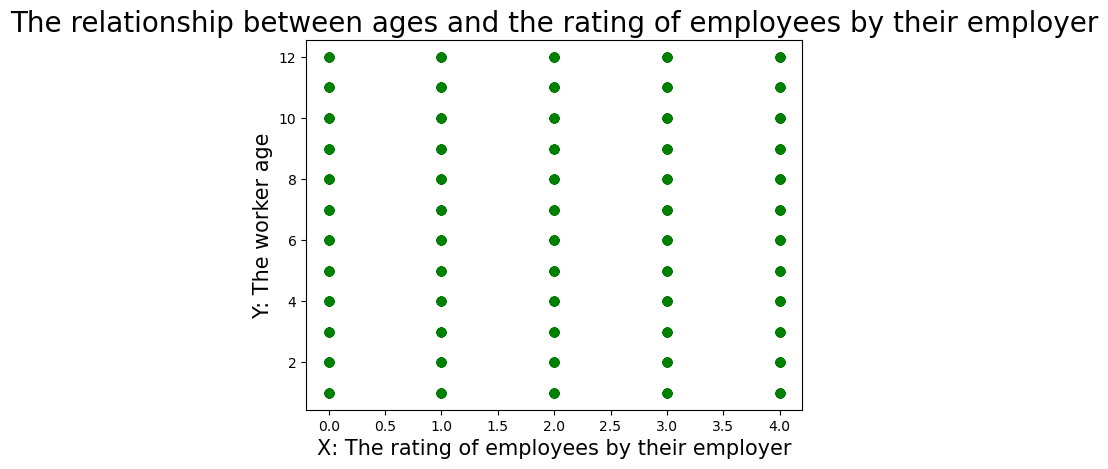

In [13]:
plt.figure()
plt.scatter(df_data["worker_rank"], df_data["hour"], color = 'g')
plt.xlabel('X: The rating of employees by their employer', fontsize = 15)
plt.ylabel('Y: The worker age', fontsize = 15)
plt.title('The relationship between ages and the rating of employees by their employer', fontsize = 20)
plt.show()

In [14]:
model = sm.OLS(df_data['hour'], df_data[['Intercept', 'worker_rank']])
results4 = model.fit()
print(results4.summary())

                            OLS Regression Results                            
Dep. Variable:                   hour   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                  0.009921
Date:                Fri, 08 Mar 2024   Prob (F-statistic):              0.921
Time:                        10:27:27   Log-Likelihood:                -5333.2
No. Observations:                2000   AIC:                         1.067e+04
Df Residuals:                    1998   BIC:                         1.068e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.4864      0.132     49.160      

<div dir="rtl">

##### הקשר בין hour ל- worker rank הוא $R^2 = 0.000$

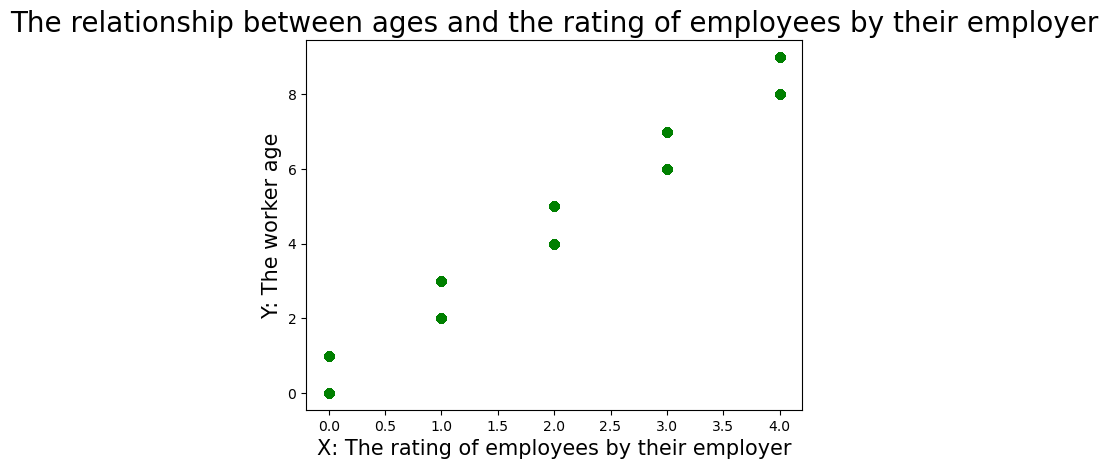

In [15]:
plt.figure()
plt.scatter(df_data["worker_rank"], df_data["expirience"], color = 'g')
plt.xlabel('X: The rating of employees by their employer', fontsize = 15)
plt.ylabel('Y: The worker age', fontsize = 15)
plt.title('The relationship between ages and the rating of employees by their employer', fontsize = 20)
plt.show()

In [16]:
model = sm.OLS(df_data['expirience'], df_data[['Intercept', 'worker_rank']])
results5 = model.fit()
print(results5.summary())

                            OLS Regression Results                            
Dep. Variable:             expirience   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                 6.535e+04
Date:                Fri, 08 Mar 2024   Prob (F-statistic):               0.00
Time:                        10:27:28   Log-Likelihood:                -1451.1
No. Observations:                2000   AIC:                             2906.
Df Residuals:                    1998   BIC:                             2917.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.5145      0.019     27.165      

<div dir="rtl">

##### הקשר בין expirience ל- worker rank הוא $R^2 = 0.97$

<div dir="rtl">

#### ניתן לראות כי יש זוג משתנים מסבירים שיש ביניהם קשר, והם expirience ו- worker rank

<div dir="rtl">

### 2. בחרו שני משתנים קטגוריאליים. 
### הציגו בשני גרפים שונים את מספר העובדים שעברו תאונה לעומת אלו שלא עברו תאונה (בצבעים שונים תאונה לעומת לא תאונה), עבור כל אחת מהקטגוריות בנפרד. 
### עבור כל אחד מהמשתנים בדקו האם אתם מזהים קטגוריה מסוימת שעבורה יש יותר סיכוי לתאונה בהשוואה לקטגוריות האחרות שבאותו משתנה? 
### אם כן, מהי אותה קטגוריה בכל אחד מהמשתנים שבחרתם? 
### בהתחשב בתשובתכם, מה לדעתכם הסבירות שהמקדמים של המשתנים שבחרתם יהיו מובהקים כחלק מרגרסיה לוגיסטית?

<div dir="rtl">

##### הצגת גרף עבור סוג הצעצוע כפונקציה של מספר האירועים שקרו או לא קרו:

In [17]:
grouped = df_data.groupby('toys_c')['safety_event'].agg(['count', 'sum'])
grouped

,count,sum
toys_c,,
dolls,45,16
electric_toys,11,6
puzzels,1063,504
spinner,407,178
toy_cars,474,213


In [18]:
grouped['safety_event_by_toys'] = grouped['sum']
grouped['no_safety_event_by_toys'] = grouped['count'] - grouped['sum']
grouped.head(5)

,count,sum,safety_event_by_toys,no_safety_event_by_toys
toys_c,,,,
dolls,45,16,16,29
electric_toys,11,6,6,5
puzzels,1063,504,504,559
spinner,407,178,178,229
toy_cars,474,213,213,261


In [19]:
toys_df_data = grouped.index.values

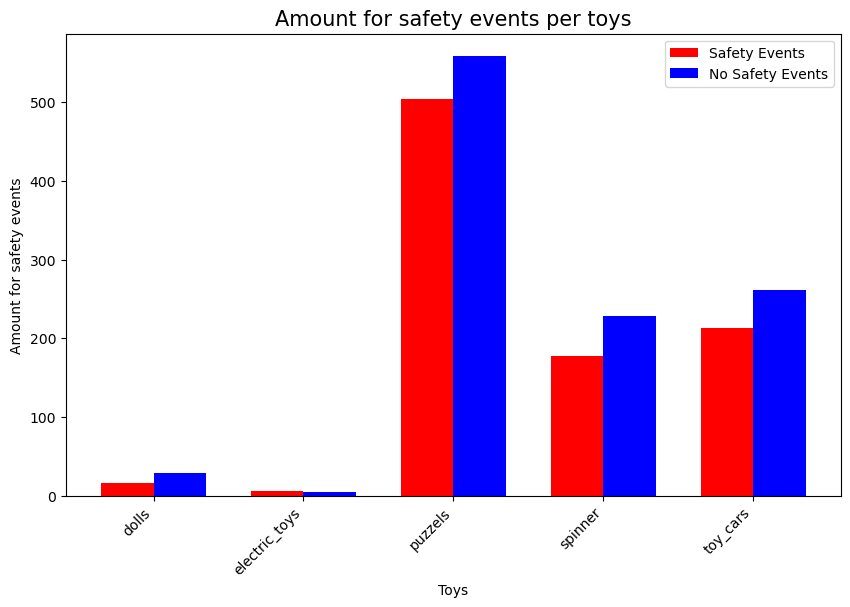

In [20]:
plt.figure(figsize=(10,6))

safety_events = grouped['safety_event_by_toys'].tolist()
no_safety_events = grouped['no_safety_event_by_toys'].tolist()
bar_width = 0.35
x = np.arange(len(toys_df_data))

plt.bar(x - bar_width/2, safety_events, width=bar_width, color='red', label='Safety Events')
plt.bar(x + bar_width/2, no_safety_events, width=bar_width, color='blue', label='No Safety Events')
plt.xticks(x, toys_df_data, rotation=45, ha='right')

plt.legend()
plt.xlabel('Toys')
plt.ylabel('Amount for safety events')
plt.title('Amount for safety events per toys', fontsize = 15)
plt.show()

<div dir="rtl">

##### כדי לראות את הסיכוי לאירועי בטיחות שקרו, לא נוכל להסתכל על כמות מפני שזה לא נותן לנו הסתכלות נכונה... יכול להיות צעצוע שמייצרים אותו הרבה יותר מאחרים ולכן המספרים גבוהים. על כן נבדוק באחוזים מתוך מספר האירועים הכללי
    
##### הצגת גרף עבור סוג הצעצוע כפונקציה של אחוז האירועים שקרו או לא קרו:

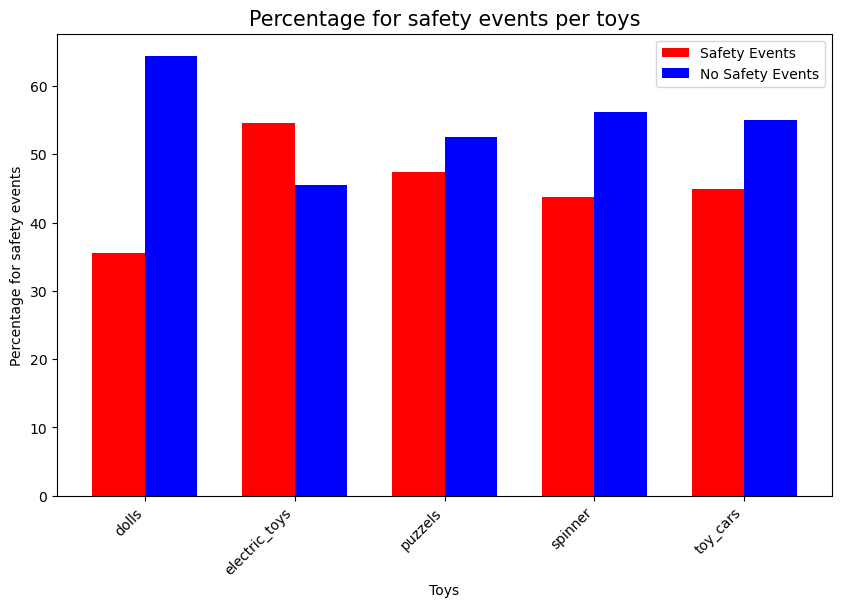

In [21]:
plt.figure(figsize=(10,6))

total_events = np.array(grouped['safety_event_by_toys']) + np.array(grouped['no_safety_event_by_toys'])
safety_percentage = np.array(grouped['safety_event_by_toys']) / total_events * 100
no_safety_percentage = np.array(grouped['no_safety_event_by_toys']) / total_events * 100
bar_width = 0.35
x = np.arange(len(toys_df_data))

plt.bar(x - bar_width/2, safety_percentage, width=bar_width, color='red', label='Safety Events')
plt.bar(x + bar_width/2, no_safety_percentage, width=bar_width, color='blue', label='No Safety Events')
plt.xticks(x, toys_df_data, rotation=45, ha='right')

plt.legend()
plt.xlabel('Toys')
plt.ylabel('Percentage for safety events')
plt.title('Percentage for safety events per toys', fontsize = 15)
plt.show()

<div dir="rtl">

#### הקטגוריה עבורה יש יותר סיכוי לתאונה בהשוואה לקטגוריות אחרות הינה 'צעצועים אלקטרוניים'.
#### לדעתנו, הסבירות למובהקות המשתנים שבחרנו היא לא גבוהה מאוד, מפני שההבדל בין סיכוי לתאונה ב- 'צעצועים אלקטרוניים' לעומת הקטגוריות האחרות כמו למשל 'פאזלים' הוא לא גדול..

<div dir="rtl">

##### הצגת גרף עבור דרגת העובד כפונקציה של מספר האירועים שקרו או לא קרו:

In [22]:
grouped2 = df_data.groupby('worker_rank')['safety_event'].agg(['count', 'sum'])
grouped2['safety_event_by_worker_rank'] = grouped2['sum']
grouped2['no_safety_event_by_worker_rank'] = grouped2['count'] - grouped2['sum']
grouped2.head(5)

,count,sum,safety_event_by_worker_rank,no_safety_event_by_worker_rank
worker_rank,,,,
0,432,260,260,172
1,394,197,197,197
2,402,192,192,210
3,363,136,136,227
4,409,132,132,277


In [23]:
worker_rank_df_data = grouped2.index.values

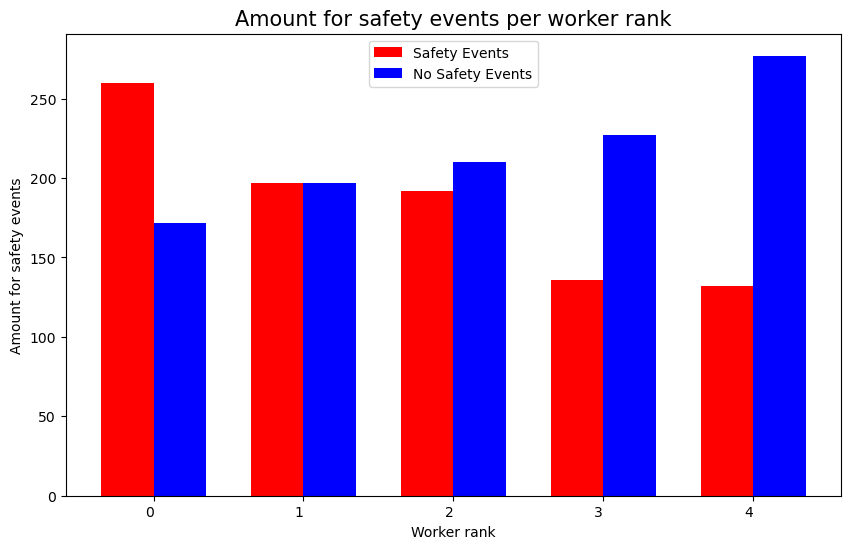

In [24]:
plt.figure(figsize=(10,6))

safety_events_2 = grouped2['safety_event_by_worker_rank'].tolist()
no_safety_events_2 = grouped2['no_safety_event_by_worker_rank'].tolist()
bar_width = 0.35
x = np.arange(len(worker_rank_df_data))

plt.bar(x - bar_width/2, safety_events_2, width=bar_width, color='red', label='Safety Events')
plt.bar(x + bar_width/2, no_safety_events_2, width=bar_width, color='blue', label='No Safety Events')
plt.xticks(x, worker_rank_df_data, ha='right')

plt.legend()
plt.xlabel('Worker rank')
plt.ylabel('Amount for safety events')
plt.title('Amount for safety events per worker rank', fontsize = 15)
plt.show()

<div dir="rtl">

##### כדי לראות את הסיכוי לאירועי בטיחות שקרו, לא נוכל להסתכל על כמות מפני שזה לא נותן לנו הסתכלות נכונה... יכולה להיות דרגה של עובד שבה נמצאים ביום יום הרבה יותר עובדים מאשר דרגות אחרות ולכן המספרים גבוהים. על כן נבדוק באחוזים מתוך מספר האירועים הכללי
    
##### הצגת גרף עבור דרגת עובד כפונקציה של אחוז האירועים שקרו או לא קרו:

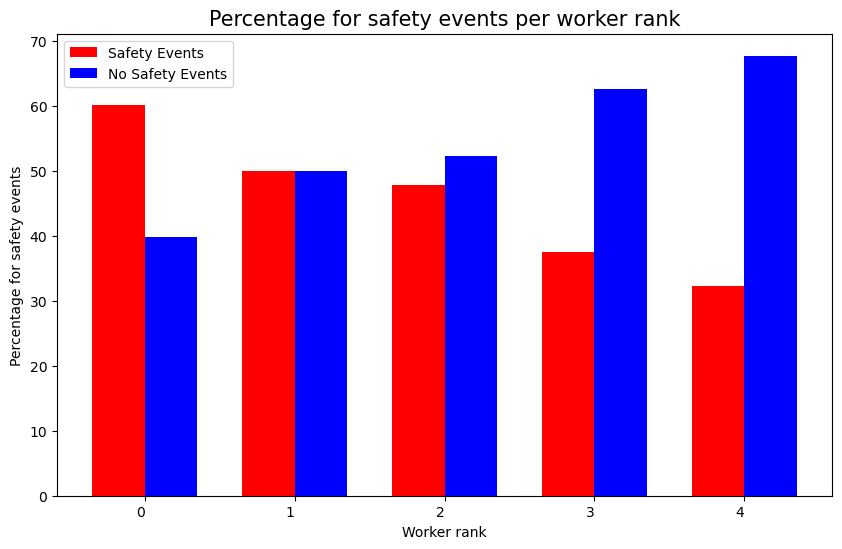

In [25]:
plt.figure(figsize=(10,6))

total_events_2 = np.array(grouped2['safety_event_by_worker_rank']) + np.array(grouped2['no_safety_event_by_worker_rank'])
safety_percentage_2 = np.array(grouped2['safety_event_by_worker_rank']) / total_events_2 * 100
no_safety_percentage_2 = np.array(grouped2['no_safety_event_by_worker_rank']) / total_events_2 * 100
bar_width = 0.35
x = np.arange(len(worker_rank_df_data))

plt.bar(x - bar_width/2, safety_percentage_2, width=bar_width, color='red', label='Safety Events')
plt.bar(x + bar_width/2, no_safety_percentage_2, width=bar_width, color='blue', label='No Safety Events')
plt.xticks(x, worker_rank_df_data, ha='right')

plt.legend()
plt.xlabel('Worker rank')
plt.ylabel('Percentage for safety events')
plt.title('Percentage for safety events per worker rank', fontsize = 15)
plt.show()

<div dir="rtl">

#### הקטגוריה עבורה יש יותר סיכוי לתאונה בהשוואה לקטגוריות אחרות הינה 'דרגת עובד 0'.
#### לדעתנו, הסבירות למובהקות המשתנים שבחרנו תהיה יחסית גבוהה, מפני שההבדל בין סיכוי לתאונה ב- 'דרגת עובד 0' לעומת הקטגוריות האחרות הוא יחסית גדול..

<div dir="rtl">

### 3. הציגו בגרף של שתי עמודות את מספר התאונות לעומת לא-תאונות עבור כלל העובדים. חשבו את הסיכוי לתאונה וללא תאונה. האם הנתונים מאוזנים?

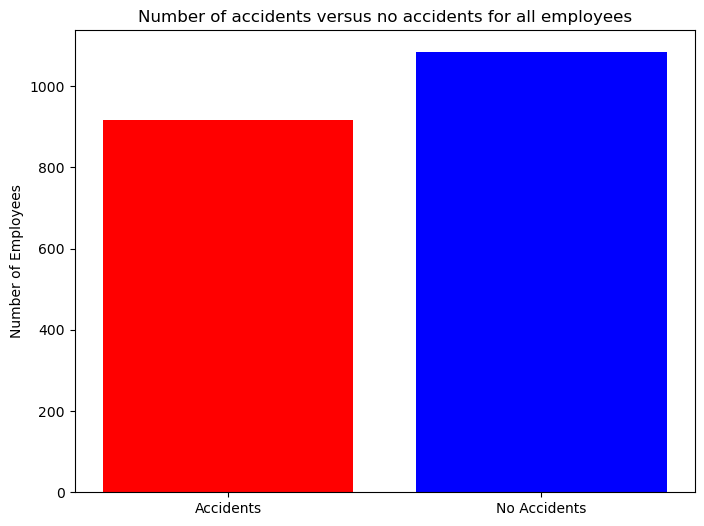

In [26]:
total_employees = len(df_data)
total_accidents = df_data['safety_event'].sum()
total_no_accidents = total_employees - total_accidents 

plt.figure(figsize=(8, 6))
plt.bar(['Accidents', 'No Accidents'], [total_accidents, total_no_accidents], color=['red', 'blue'])
plt.ylabel('Number of Employees')
plt.title('Number of accidents versus no accidents for all employees')
plt.show()

In [27]:
chance_accident = total_accidents / total_employees
chance_no_accident = total_no_accidents / total_employees

print("Chance of an accident:", chance_accident)
print("Chance of no accident:", chance_no_accident)

Chance of an accident: 0.4585
Chance of no accident: 0.5415


<div dir="rtl">

#### הנתונים יחסית מאוזנים, מאוד קרובים ל50 אחוז אך עדיין יש יותר סיכוי שלא תקרה תאונה לעובד מבין כלל העובדים.

<div dir="rtl">

### 4. נא להוציא הסטוגרמה של אחד המשתנים הרציפים. יש להסביר במשפט מה הנתונים מה מציגים (טווח, היכן יש ריכוז גבוה) 

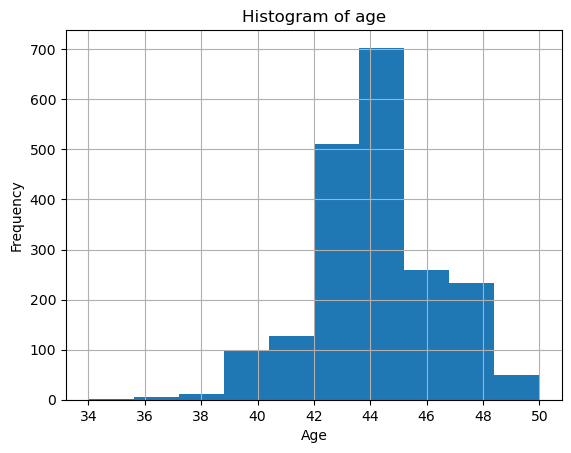

In [28]:
df_data.age.hist()
plt.title('Histogram of age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<div dir="rtl">

#### הנתונים מראים שרוב העובדים במפעל הם בגילאים 42-45. נשים לב כי אין צעירים וזקנים במפעל, כולם החל מגיל 34 ועד גיל 50.

<div dir="rtl">

### 5. לפני שמתחילים את הניתוח הלוגיסטי - נא לפצל את כל הנתונים לtrain -ו test לפי יחס של 30-70

In [29]:
cat_vars=['days_c','toys_c','factories_rand_c','months_c']
for var in cat_vars:
    cat_list = pd.get_dummies(df_data[var], prefix=var, drop_first=True)
    cat_list = cat_list.astype(int)
    df_data = df_data.join(cat_list, rsuffix='_' + var)

In [30]:
df_data["days_c"].unique()

array(['Friday', 'Thursday', 'Tuesday', 'Monday', 'Wednesday'],
      dtype=object)

In [31]:
df_data.columns

Index(['age', 'expirience', 'hour', 'worker_rank', 'days_c', 'toys_c',
       'factories_rand_c', 'months_c', 'safety_event', 'Intercept',
       'days_c_Monday', 'days_c_Thursday', 'days_c_Tuesday',
       'days_c_Wednesday', 'toys_c_electric_toys', 'toys_c_puzzels',
       'toys_c_spinner', 'toys_c_toy_cars', 'factories_rand_c_Bengbu',
       'factories_rand_c_Hefei', 'factories_rand_c_Huainan',
       'factories_rand_c_Huangshan', 'factories_rand_c_Ma’anshan',
       'months_c_August', 'months_c_December', 'months_c_February',
       'months_c_January', 'months_c_July', 'months_c_June', 'months_c_March',
       'months_c_May', 'months_c_November', 'months_c_October',
       'months_c_September'],
      dtype='object')

In [32]:
data_vars=df_data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [33]:
data_final=df_data[to_keep]
data_final.columns.values

array(['age', 'expirience', 'hour', 'worker_rank', 'safety_event',
       'Intercept', 'days_c_Monday', 'days_c_Thursday', 'days_c_Tuesday',
       'days_c_Wednesday', 'toys_c_electric_toys', 'toys_c_puzzels',
       'toys_c_spinner', 'toys_c_toy_cars', 'factories_rand_c_Bengbu',
       'factories_rand_c_Hefei', 'factories_rand_c_Huainan',
       'factories_rand_c_Huangshan', 'factories_rand_c_Ma’anshan',
       'months_c_August', 'months_c_December', 'months_c_February',
       'months_c_January', 'months_c_July', 'months_c_June',
       'months_c_March', 'months_c_May', 'months_c_November',
       'months_c_October', 'months_c_September'], dtype=object)

In [34]:
data_final_vars=data_final.columns.values.tolist()
y1=['safety_event']
X1=[i for i in data_final_vars if i not in y1]

In [35]:
X = data_final[X1]
y = data_final[y1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

<div dir="rtl">

### 6. נא למצוא את משוואת הרגרסיה הלוגיסטית. יש להוציא את כל המשתנים הלא מובהקים ולעשות איטרציות עד אשר מגיעים למשוואה שכולם מובהקים. עבור כל איטרציה שמוצאים משתנים יש לחשב את הAIC ו-BIC. למי יש את הכי נמוך? למה נראה לך שזו התוצאה שהתקבלה.

In [36]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   age                         2000 non-null   int32
 1   expirience                  2000 non-null   int32
 2   hour                        2000 non-null   int32
 3   worker_rank                 2000 non-null   int32
 4   safety_event                2000 non-null   int64
 5   Intercept                   2000 non-null   int64
 6   days_c_Monday               2000 non-null   int32
 7   days_c_Thursday             2000 non-null   int32
 8   days_c_Tuesday              2000 non-null   int32
 9   days_c_Wednesday            2000 non-null   int32
 10  toys_c_electric_toys        2000 non-null   int32
 11  toys_c_puzzels              2000 non-null   int32
 12  toys_c_spinner              2000 non-null   int32
 13  toys_c_toy_cars             2000 non-null   int32
 14  factorie

In [37]:
logit_model=sm.Logit(y_train,X_train)
result_train=logit_model.fit()
print(result_train.summary())

Optimization terminated successfully.
         Current function value: 0.398920
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           safety_event   No. Observations:                 1400
Model:                          Logit   Df Residuals:                     1371
Method:                           MLE   Df Model:                           28
Date:                Fri, 08 Mar 2024   Pseudo R-squ.:                  0.4228
Time:                        10:27:32   Log-Likelihood:                -558.49
converged:                       True   LL-Null:                       -967.64
Covariance Type:            nonrobust   LLR p-value:                3.037e-154
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
age                           -0.4697      0.039    -12.019      0.000      

In [38]:
result_train.aic, result_train.bic

(1174.9760351291989, 1327.058633081696)

In [39]:
df_p_2 = pd.DataFrame(result_train.pvalues, columns = [ 'pval'])
df_p_2['vars'] = df_p_2.index
df_p_2 = df_p_2.reset_index()
var_cols = []
for var in df_p_2['vars']:
    if df_p_2.loc[df_p_2['vars']==var, 'pval'].item() < 0.05:
        var_cols.append(var)
X2_train =data_final[var_cols]
y2_train =data_final['safety_event']

logit_model=sm.Logit(y2_train,X2_train)
result_train_2=logit_model.fit()
print(result_train_2.summary())

Optimization terminated successfully.
         Current function value: 0.435783
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           safety_event   No. Observations:                 2000
Model:                          Logit   Df Residuals:                     1985
Method:                           MLE   Df Model:                           14
Date:                Fri, 08 Mar 2024   Pseudo R-squ.:                  0.3682
Time:                        10:27:32   Log-Likelihood:                -871.57
converged:                       True   LL-Null:                       -1379.4
Covariance Type:            nonrobust   LLR p-value:                6.818e-208
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
age                           -0.4196      0.030    -13.790      0.000      

In [40]:
result_train_2.aic, result_train_2.bic

(1773.1316276987163, 1857.1451645918476)

In [41]:
df_p_2 = pd.DataFrame(result_train_2.pvalues, columns = [ 'pval'])
df_p_2['vars'] = df_p_2.index
df_p_2 = df_p_2.reset_index()
var_cols = []
for var in df_p_2['vars']:
    if df_p_2.loc[df_p_2['vars']==var, 'pval'].item() < 0.05:
        var_cols.append(var)
X3_train =data_final[var_cols]
y3_train =data_final['safety_event']

logit_model=sm.Logit(y3_train,X3_train)
result_train_3=logit_model.fit()
print(result_train_3.summary())

Optimization terminated successfully.
         Current function value: 0.436539
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           safety_event   No. Observations:                 2000
Model:                          Logit   Df Residuals:                     1986
Method:                           MLE   Df Model:                           13
Date:                Fri, 08 Mar 2024   Pseudo R-squ.:                  0.3671
Time:                        10:27:32   Log-Likelihood:                -873.08
converged:                       True   LL-Null:                       -1379.4
Covariance Type:            nonrobust   LLR p-value:                3.377e-208
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
age                           -0.4184      0.030    -13.791      0.000      

In [42]:
result_train_3.aic, result_train_3.bic

(1774.1576778572412, 1852.5703122908303)

<div dir="rtl">

#### ניתן לראות שלמודל result_train_3 ערך BIC הכי נמוך, אך למודל result_train_2 ערך AIC הכי נמוך 
#### כאשר AIC עולה וBIC יורד, זה אומר שהמודל הפך לפשוט יותר בעקבות הסרת משתנים.
#### נשים לב ש-BIC נוטה להעדיף מודלים פשוטים יותר מאשר AIC ולכן נראה ב-BIC ירידה אך עלייה בAIC...

In [43]:
result_train_3.params

age                           -0.418363
hour                          -0.428515
Intercept                     19.903214
days_c_Thursday                0.829507
days_c_Tuesday                -0.598802
days_c_Wednesday               0.671704
factories_rand_c_Bengbu        1.529704
factories_rand_c_Huainan       1.565726
factories_rand_c_Huangshan    -0.400273
months_c_December              1.328944
months_c_March                 0.517404
months_c_May                   1.457931
months_c_November              1.231524
months_c_September             3.675281
dtype: float64

#### $$ Logit(p) = 19.9032 + (-0.4184)*age + (-0.4285)*hour + 0.8295*days_c_Thursday + (-0.5988)*days_c_Tuesday + 0.6717*days_c_Wednesday + 1.5297*factories_rand_c_Bengbu + 1.5657*factories_rand_c_Huainan + (-0.4003)*factories_rand_c_Huangshan + 1.3289*months_c_December + 0.5174*months_c_March + 1.4579*months_c_May + 1.2315*months_c_November + 3.6753*months_c_September  $$

<div dir="rtl">

### 7. מה הסיכוי לתאונה עבור מצב שכל משתני הדמה במצב בסיס שלהם וכל המשתנים הרציפים עם הערך הממוצע של המשתנה בtrain set?

In [44]:
input_data_3 = pd.DataFrame({
    'age': data_final['age'].mean(),
    'hour': data_final['hour'].mean(),
    'intercept': [1],
    'days_c_Thursday': [0],
    'days_c_Tuesday': [0],
    'days_c_Wednesday': [0],
    'factories_rand_c_Bengbu': [0],
    'factories_rand_c_Huainan': [0],
    'factories_rand_c_Huangshan': [0],
    'months_c_December': [0],
    'months_c_March': [0],
    'months_c_May': [0],
    'months_c_November': [0],
    'months_c_September': [0]})

In [45]:
predict_probability = result_train_3.predict(input_data_3)
predict_probability

0    0.208983
dtype: float64

<div dir="rtl">
    
### 8. נרצה כעת להשוות בין 2 קבוצות שונות של משתנה קטגוריאלי כפונקציה של כל הערכים האפשריים של משתנה רציף כלשהו. 

### כלומר נבחר משתנה קטגוריאלי אחד ומשתנה רציף אחד.  
###  נחשב עבור כל ערך של המשתנה הקטגוריאלי את ההסתברות לתאונה כפונקציה של המשתנה הרציף. 
### טווח של המשתנה הרציף צריך להיות בין הערך המינימאלי של הtrain set לערך המקסימלי.
### הערכים של שאר המשתנים: עבור המשתנים הקטגוריאלים נכניס את הערך 0. ועבור שאר המשתנים הרציפים (אם יש כאלו) נכניס את הערך הממוצע של הtrain set. 
### יש לחשב את ההסתברות ולהוציא גרף שמראה את שתי העקומות שהתקבלו
### האם ניתן לראות בבירור איזו קטגוריה יותר מועדת לתאונות?

In [46]:
data_final["age"].min(),data_final["age"].max()

(34, 50)

In [47]:
data_final.columns

Index(['age', 'expirience', 'hour', 'worker_rank', 'safety_event', 'Intercept',
       'days_c_Monday', 'days_c_Thursday', 'days_c_Tuesday',
       'days_c_Wednesday', 'toys_c_electric_toys', 'toys_c_puzzels',
       'toys_c_spinner', 'toys_c_toy_cars', 'factories_rand_c_Bengbu',
       'factories_rand_c_Hefei', 'factories_rand_c_Huainan',
       'factories_rand_c_Huangshan', 'factories_rand_c_Ma’anshan',
       'months_c_August', 'months_c_December', 'months_c_February',
       'months_c_January', 'months_c_July', 'months_c_June', 'months_c_March',
       'months_c_May', 'months_c_November', 'months_c_October',
       'months_c_September'],
      dtype='object')

In [48]:
data_predA = data_final.loc[data_final['days_c_Thursday']==0,:]

data_predA = data_predA.reset_index()
x_vals = np.linspace(34, 50, data_predA.shape[0])

data_predA['age'] = x_vals
data_predA['hour_A'] = data_final['hour'].mean()
data_predA['Intercept'] = np.ones(data_predA.shape[0])
data_predA['days_c_Tuesday_A'] = 0
data_predA['days_c_Wednesday_A'] = 0
data_predA['factories_rand_c_Bengbu_A'] = 0
data_predA['factories_rand_c_Huainan_A'] = 0
data_predA['factories_rand_c_Huangshan_A'] = 0
data_predA['months_c_December_A'] = 0
data_predA['months_c_March_A'] = 0
data_predA['months_c_May_A'] = 0
data_predA['months_c_November_A'] = 0
data_predA['months_c_September_A'] = 0

data_predA['safety_event_prob'] = result_train_3.predict(data_predA[['age', 'hour_A','Intercept', 'days_c_Thursday', 'days_c_Tuesday_A', 'days_c_Wednesday_A', 'factories_rand_c_Bengbu_A', 'factories_rand_c_Huainan_A', 'factories_rand_c_Huangshan_A', 'months_c_December_A', 'months_c_March_A', 'months_c_May_A', 'months_c_November_A', 'months_c_September_A']])

data_predA.head()

,index,age,expirience,hour,worker_rank,safety_event,Intercept,days_c_Monday,days_c_Thursday,days_c_Tuesday,...,days_c_Wednesday_A,factories_rand_c_Bengbu_A,factories_rand_c_Huainan_A,factories_rand_c_Huangshan_A,months_c_December_A,months_c_March_A,months_c_May_A,months_c_November_A,months_c_September_A,safety_event_prob
0,0,34.000000,3,11,1,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.947590
1,1,34.009308,9,2,4,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.947396
2,2,34.018615,2,8,1,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.947201
3,3,34.027923,1,1,0,1,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.947006
4,6,34.037231,8,7,4,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.946811


In [49]:
data_predB = data_final.loc[data_final['days_c_Thursday']==1,:]

data_predB = data_predB.reset_index()
x_vals = np.linspace(34, 50, data_predB.shape[0])

data_predB['age'] = x_vals
data_predB['hour_B'] = data_final['hour'].mean()
data_predB['Intercept'] = np.ones(data_predB.shape[0])
data_predB['days_c_Tuesday_B'] = 0
data_predB['days_c_Wednesday_B'] = 0
data_predB['factories_rand_c_Bengbu_B'] = 0
data_predB['factories_rand_c_Huainan_B'] = 0
data_predB['factories_rand_c_Huangshan_B'] = 0
data_predB['months_c_December_B'] = 0
data_predB['months_c_March_B'] = 0
data_predB['months_c_May_B'] = 0
data_predB['months_c_November_B'] = 0
data_predB['months_c_September_B'] = 0

data_predB['safety_event_prob'] = result_train_3.predict(data_predB[['age', 'hour_B','Intercept', 'days_c_Thursday', 'days_c_Tuesday_B', 'days_c_Wednesday_B', 'factories_rand_c_Bengbu_B', 'factories_rand_c_Huainan_B', 'factories_rand_c_Huangshan_B', 'months_c_December_B', 'months_c_March_B', 'months_c_May_B', 'months_c_November_B', 'months_c_September_B']])

data_predB.head()

,index,age,expirience,hour,worker_rank,safety_event,Intercept,days_c_Monday,days_c_Thursday,days_c_Tuesday,...,days_c_Wednesday_B,factories_rand_c_Bengbu_B,factories_rand_c_Huainan_B,factories_rand_c_Huangshan_B,months_c_December_B,months_c_March_B,months_c_May_B,months_c_November_B,months_c_September_B,safety_event_prob
0,4,34.000000,5,4,2,1,1.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0.976439
1,5,34.057348,0,4,0,1,1.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0.975881
2,11,34.114695,1,4,0,1,1.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0.975310
3,18,34.172043,8,7,4,0,1.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0.974725
4,26,34.229391,1,8,0,1,1.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0.974127


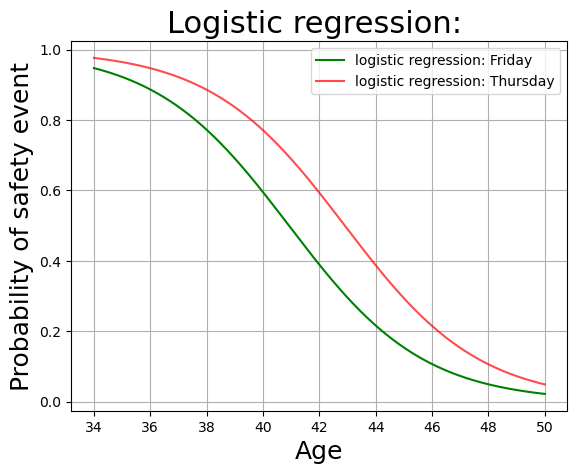

In [50]:
plt.figure()
plt.plot(data_predA['age'], data_predA['safety_event_prob'], label = 'logistic regression: Friday', color = 'green')
plt.plot(data_predB['age'], data_predB['safety_event_prob'], label = 'logistic regression: Thursday', color = 'red',alpha=0.7)
plt.xlabel('Age', fontsize = 18)
plt.ylabel('Probability of safety event',  fontsize = 18)
plt.grid()
plt.title('Logistic regression: ',  fontsize = 22)
plt.legend()
plt.show()

<div dir="rtl">

#### ניתן לראות בבירור שיום חמישי לעומת ימים שישי ושני (יום שני זהו יום שירד עקב אי מובהקות מהמודל), ההסתברות לתאונה בכל הגילאים שבטווח החלוקה לפי אימון המודל היא יותר גבוהה.
#### מפני שרואים שהגרף כאשר מדברים על יום חמישי הוא מעל הגרף של יום שישי, כך שהוא מראה שבכל גיל תמיד ההסתברות לתאונה גדולה יותר. 

<div dir="rtl">

### 9. בהמשך לסעיף 8 יש לחשב את הodd ratio  כפונקציה של המשתנה הרציף. נא להוציא גרף שמראה את התוצאה. יש להסביר את התוצאה שקיבלתם ולמה הגרף נראה כפי שהוא נראה. בנוסף יש לחשב את הlog odd ratio מה המשמעות שלו?

In [51]:
odds_ratios = np.exp(result_train_3.params['days_c_Thursday'])
odds_ratios

2.2921877117383214

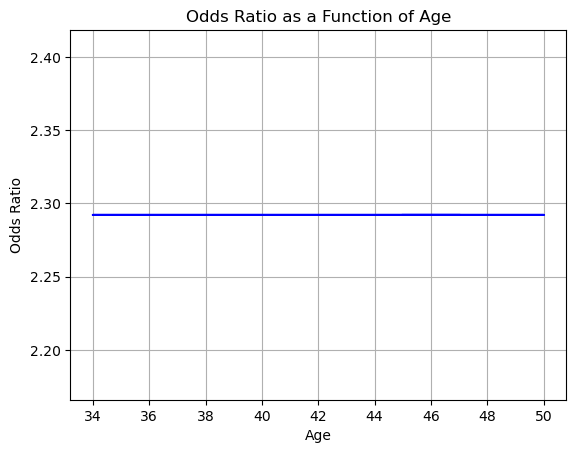

In [52]:
plt.plot(data_final["age"], odds_ratios * np.ones_like(data_final["age"]), color='blue', linestyle='-')
plt.xlabel('Age')
plt.ylabel('Odds Ratio')
plt.title('Odds Ratio as a Function of Age')
plt.grid(True)
plt.show()

<div dir="rtl">

#### הגרף נראה כך כי עבור כל ערכי המשתנה של הגילאים יחס הסיכויים קבוע. דבר זה קורה מפני שמודל הרגרסיה הלוגיסטית מניח קשר ליניארי בין המשתנה הבלתי תלוי (גיל) לבין סיכויי הלוג של התוצאה

In [53]:
result_train_3.params['days_c_Thursday']

0.8295066941631697

<div dir="rtl">

#### ה- log odds ratio הוא הערך הלינארי של המשתנה הקטגוריאלי שלנו, ועל כן הוא שווה 0.829507.
#### בפועל הוא log של היחס בין ה-odds של מקרה אחד לodds של מקרה אחר

<div dir="rtl">

### סעיפים 10-12 מתייחסים לtest set.    

### 10. נא להציג את הconfusion matrix
###  מהו הערך סף המקסימלי כך שה-sensitivity יהיה לפחות 0.8? יש לעשות זאת עבור הtest set.

In [54]:
X_test_subset = X_test[X3_train.columns]

X_test_final = X_test_subset.reset_index(drop=True)
y_test_final = y_test.reset_index(drop=True)
X_test_final.columns

Index(['age', 'hour', 'Intercept', 'days_c_Thursday', 'days_c_Tuesday',
       'days_c_Wednesday', 'factories_rand_c_Bengbu',
       'factories_rand_c_Huainan', 'factories_rand_c_Huangshan',
       'months_c_December', 'months_c_March', 'months_c_May',
       'months_c_November', 'months_c_September'],
      dtype='object')

In [55]:
data_final['prob_preds'] = result_train_3.predict(data_final[['age','hour', 'Intercept', 'days_c_Thursday', 'days_c_Tuesday', 'days_c_Wednesday', 'factories_rand_c_Bengbu', 'factories_rand_c_Huainan', 'factories_rand_c_Huangshan', 'months_c_December', 'months_c_March', 'months_c_May', 'months_c_November', 'months_c_September']])
data_final.head()

C:\Users\נועה\AppData\Local\Temp\ipykernel_15852\4177040883.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final['prob_preds'] = result_train_3.predict(data_final[['age','hour', 'Intercept', 'days_c_Thursday', 'days_c_Tuesday', 'days_c_Wednesday', 'factories_rand_c_Bengbu', 'factories_rand_c_Huainan', 'factories_rand_c_Huangshan', 'months_c_December', 'months_c_March', 'months_c_May', 'months_c_November', 'months_c_September']])


,age,expirience,hour,worker_rank,safety_event,Intercept,days_c_Monday,days_c_Thursday,days_c_Tuesday,days_c_Wednesday,...,months_c_February,months_c_January,months_c_July,months_c_June,months_c_March,months_c_May,months_c_November,months_c_October,months_c_September,prob_preds
0,47,3,11,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0.051770
1,44,9,2,4,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0.760537
2,44,2,8,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0.139946
3,46,1,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.761093
4,47,5,4,2,1,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0.546579


In [56]:
data_final['classification'] = data_final['prob_preds'].apply(lambda x: 1 if x >0.5  else 0)

C:\Users\נועה\AppData\Local\Temp\ipykernel_15852\2893596547.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final['classification'] = data_final['prob_preds'].apply(lambda x: 1 if x >0.5  else 0)


In [57]:
TP = data_final.loc[(data_final['safety_event']==1)&(data_final['classification']==1), :].shape[0]
FP = data_final.loc[(data_final['safety_event']==0)&(data_final['classification']==1), :].shape[0]
TN = data_final.loc[(data_final['safety_event']==0)&(data_final['classification']==0), :].shape[0]
FN = data_final.loc[(data_final['safety_event']==1)&(data_final['classification']==0), :].shape[0]

TP, FP, TN, FN

(706, 198, 885, 211)

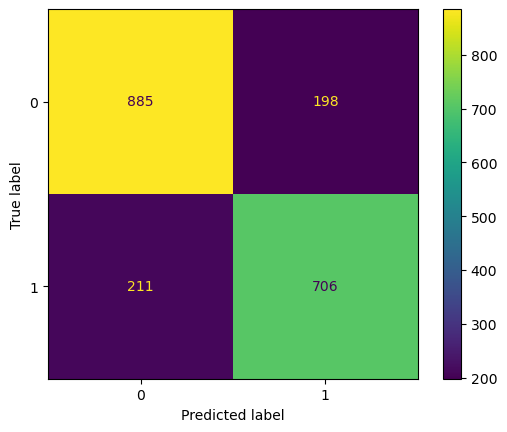

In [58]:
cm = confusion_matrix(data_final['safety_event'], data_final['classification'])

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=np.array([0,1]))
disp.plot()

plt.show()

In [59]:
def get_fpr_tpr(threshold):
    
    preds = result_train_3.predict(X_test_final)

    df_preds = pd.DataFrame(preds, columns=['pred_prob'])
    df_preds['classification'] = df_preds['pred_prob'].apply(lambda x: 1 if x > threshold else 0)

    y_pred = df_preds['classification']
    confusion_matrix_ = confusion_matrix(y_test_final, y_pred)

    sensitivity = confusion_matrix_[1,1]/(confusion_matrix_[1,0]+confusion_matrix_[1,1])
    
    return (sensitivity)

In [60]:
threshold = np.linspace(1,0,10)
for thres in threshold:
    sensitivity = get_fpr_tpr(thres)
    if sensitivity >= 0.8:
        print("The threshold is:", thres)
        break

The threshold is: 0.4444444444444444


<div dir="rtl">

#### ערך הסף שעבורו הsensetivity יהיה לפחות 0.8 הוא 0.4444444444444444.

<div dir="rtl">

### 11. יש להוציא ROC curve עבור המודל הסופי ולחשב את הAUC.

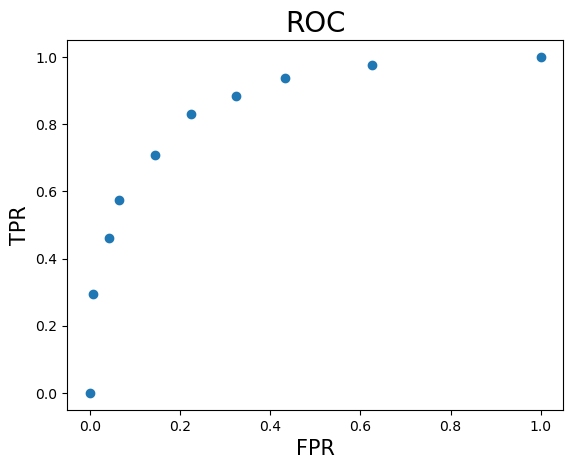

In [61]:
fprs = []
sensi = []
thresholds = np.linspace(0,1,10)

for threshold in thresholds:
    logit_model=sm.Logit(y3_train,X3_train)
    result_train=logit_model.fit(disp=False)
    preds = result_train.predict(X_test_final)

    df_preds = pd.DataFrame(preds, columns=['pred_prob'])
    df_preds['classification'] = df_preds['pred_prob'].apply(lambda x: 1 if x > threshold else 0)

    y_pred = df_preds['classification']
    confusion_matrix_ = confusion_matrix(y_test_final, y_pred)


    sensitivity_ = confusion_matrix_[1,1]/(confusion_matrix_[1,0]+confusion_matrix_[1,1])
    specificty_ = confusion_matrix_[0,0]/(confusion_matrix_[0,1]+confusion_matrix_[0,0])
    fpr = 1-specificty_
    
    fprs.append(fpr)
    sensi.append(sensitivity_)

plt.figure()
plt.scatter( fprs, sensi)
plt.xlabel('FPR', fontsize = 15)
plt.ylabel('TPR', fontsize = 15)
plt.title('ROC', fontsize = 20)
plt.show()

In [62]:
features = data_final[['age','hour', 'Intercept', 'days_c_Thursday', 'days_c_Tuesday', 'days_c_Wednesday', 'factories_rand_c_Bengbu', 'factories_rand_c_Huainan', 'factories_rand_c_Huangshan', 'months_c_December', 'months_c_March', 'months_c_May', 'months_c_November', 'months_c_September']]

In [63]:
logreg = LogisticRegression()
logreg.fit(features, data_final['safety_event'])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

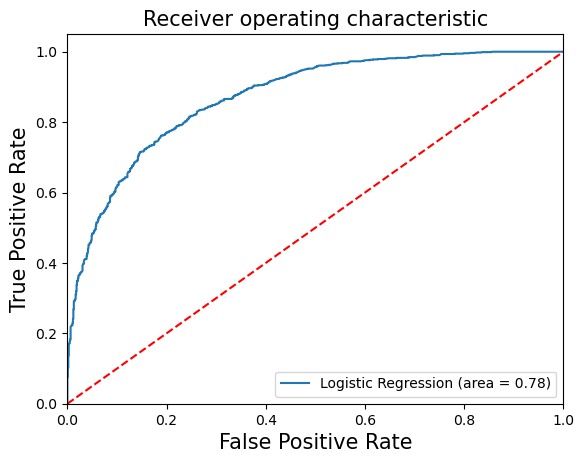

In [64]:
logit_roc_auc_1 = roc_auc_score(data_final['safety_event'], logreg.predict(features))
fpr_1, tpr_1, thresholds_1 = roc_curve(data_final['safety_event'], logreg.predict_proba(features)[:,1])
plt.figure()
plt.plot(fpr_1, tpr_1, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_1)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize = 15)
plt.ylabel('True Positive Rate', fontsize = 15)
plt.title('Receiver operating characteristic', fontsize = 15)
plt.legend(loc="lower right")
plt.show()

<div dir="rtl">

#### ה- AUC שהוא השטח מתחת לגרף שווה ל- 0.78

<div dir="rtl">

### 12. יש להוציא עוד שני ROC curves. פעם אחת כאשר אתם מוציאים משתנה רציף אחד ופעם שנייה כאשר אתם מוציאים משתנה קטגוריאלי מהמודל. יש להכניס את כל הROC curves כולל את העקומה מסעיף 11 ולשים בגרף אחד. יש להשוות בין שלוש ה-AUC. מה קרה לAUC אחרי שהוצאתם את המשתנה הרציף ואחרי שהוצאתם את המשתנה הקטוגוריאלי? מי הושפע יותר ? מה זה אומר לדעתכם?

In [65]:
features_12A = features.drop(columns=['hour'])

In [66]:
logreg_2 = LogisticRegression()
logreg_2.fit(features_12A, data_final['safety_event'])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

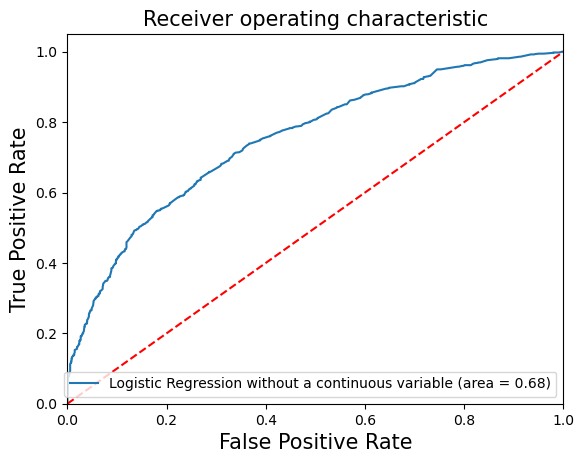

In [67]:
logit_roc_auc_2 = roc_auc_score(data_final['safety_event'], logreg_2.predict(features_12A))
fpr_2, tpr_2, thresholds_2 = roc_curve(data_final['safety_event'], logreg_2.predict_proba(features_12A)[:,1])
plt.figure()
plt.plot(fpr_2, tpr_2, label='Logistic Regression without a continuous variable (area = %0.2f)' % logit_roc_auc_2)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize = 15)
plt.ylabel('True Positive Rate', fontsize = 15)
plt.title('Receiver operating characteristic', fontsize = 15)
plt.legend(loc="lower right")
plt.show()

<div dir="rtl">

##### ה- AUC שהוא השטח מתחת לגרף שווה ל-0.68

In [68]:
features_12B = features.drop(columns=['factories_rand_c_Bengbu'])

In [69]:
logreg_3 = LogisticRegression()
logreg_3.fit(features_12B, data_final['safety_event'])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

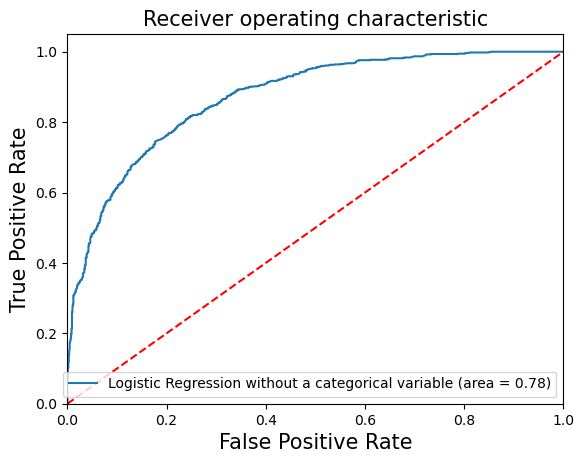

In [70]:
logit_roc_auc_3 = roc_auc_score(data_final['safety_event'], logreg_3.predict(features_12B))
fpr_3, tpr_3, thresholds_3 = roc_curve(data_final['safety_event'], logreg_3.predict_proba(features_12B)[:,1])
plt.figure()
plt.plot(fpr_3, tpr_3, label='Logistic Regression without a categorical variable (area = %0.2f)' % logit_roc_auc_3)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize = 15)
plt.ylabel('True Positive Rate', fontsize = 15)
plt.title('Receiver operating characteristic', fontsize = 15)
plt.legend(loc="lower right")
plt.show()

<div dir="rtl">

##### ה- AUC שהוא השטח מתחת לגרף שווה ל- 0.78

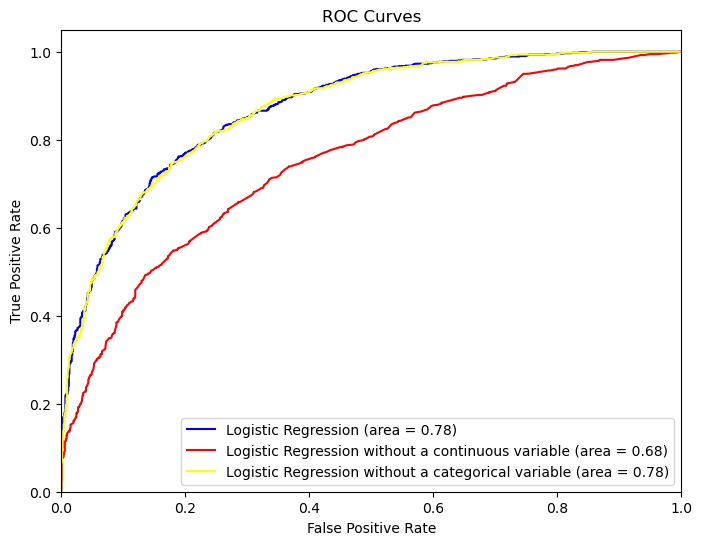

In [71]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_1, tpr_1, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_1, color='blue')
plt.plot(fpr_2, tpr_2, label='Logistic Regression without a continuous variable (area = %0.2f)' % logit_roc_auc_2, color='red')
plt.plot(fpr_3, tpr_3, label='Logistic Regression without a categorical variable (area = %0.2f)' % logit_roc_auc_3, color='yellow')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.show()

<div dir="rtl">

#### כאשר הוצאנו משתנה רציף ה- AUC ירד, אך כאשר הוצאנו משתנה קטגוריאלי ה- AUC נשאר אותו הדבר.
#### לדעתנו, הסיבה לכך היא שככל הנראה למשתנה הרציף שהוצאנו יש יותר משמעות עבור המודל ולכן כאשר הורדנו אותו מהמודל הסיווג היה פחות טוב.

<div dir="rtl">
    
## חלק שני
    
### בחלק זה תעזרו לרלב"ד לחזות כמות מקרים של נהיגה בשכרות.
    
### כידוע נהיגה אחרי ששותים גורם לתאונות דרכים ולכן נרצה להבין תחת אילו מקרים זה קורה לרוב על מנת שהרלב"ד יידע לרכז שם את מאמציו. כמו-כן גם משטרת ישראל יכולה להשתמש במידע זה כאשר היא מציבה ניידות משטרה. 
    
### לפניך dataset עם מספר משתנים מסבירים ומשתנה מוסבר - כמות מקרים של נהגים שנתפסו נוהגים בשכרות בחודש ינואר בקטע כביש מסוים.

* road_lenght - the lenght of kilomoters of the road
* intercept - simply a column of ones to add intercept to the model
* age - the driver's age
* license_year - the number of years the driver hold a license 
* gender - the gender of the driver
* day_time - the time of day: morning, afternoon, evening and night
* drunk driver - the number of drunk drivers are found in that road in January  
    
<div dir="rtl">

### להלן מספר מטלות:
    
### 1. נא להוציא הסטוגרמה של מספר הנהגים השיכורים, מה ההתרשמות הכללית?

In [72]:
df_data_2 = pkl.load(open('C:/Users/נועה/Desktop/ניהול בטיחות למהנדסים/פרויקט/drunk_driver_grpoup_1.pkl', 'rb'))

In [73]:
df_data_2.head()

,road_lenght,intercept,age,liscene_year,num_in_car,geneder__c,day_time_rand__c,drunk_driver
0,28.213353,1.0,21,17,4,male,morning,149
1,5.319471,1.0,48,30,1,male,morning,170
2,20.403327,1.0,43,25,1,male,night,461
3,22.437722,1.0,35,17,4,male,morning,182
4,23.233547,1.0,24,17,3,male,morning,139


In [74]:
df_data_2.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   road_lenght       10000 non-null  float64
 1   intercept         10000 non-null  float64
 2   age               10000 non-null  int32  
 3   liscene_year      10000 non-null  int32  
 4   num_in_car        10000 non-null  int32  
 5   geneder__c        10000 non-null  object 
 6   day_time_rand__c  10000 non-null  object 
 7   drunk_driver      10000 non-null  int32  
dtypes: float64(2), int32(4), object(2)
memory usage: 468.9+ KB


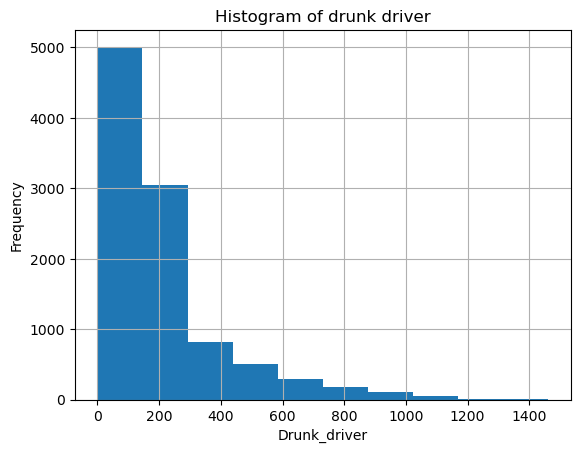

In [75]:
df_data_2.drunk_driver.hist()
plt.title('Histogram of drunk driver')
plt.xlabel('Drunk_driver')
plt.ylabel('Frequency')
plt.show()

<div dir="rtl">

#### ניתן לראות כי במהלך חודש ינואר נתפסו ברוב המקטעים יחסית מעט נהגים שיכורים, בין 0-200 נהגים בערך ברוב הקטעים.

<div dir="rtl">

### 2. להציג scatter plot עבור כל זוג משתנים מסבירים ולחשב קורלציה (r) בין כל זוג. האם יש זוג משתנים שיש בינהם קשר? אם כן, אילו?

<div dir="rtl">

##### הקשר בין הגיל למספר שנים של הרישיון:

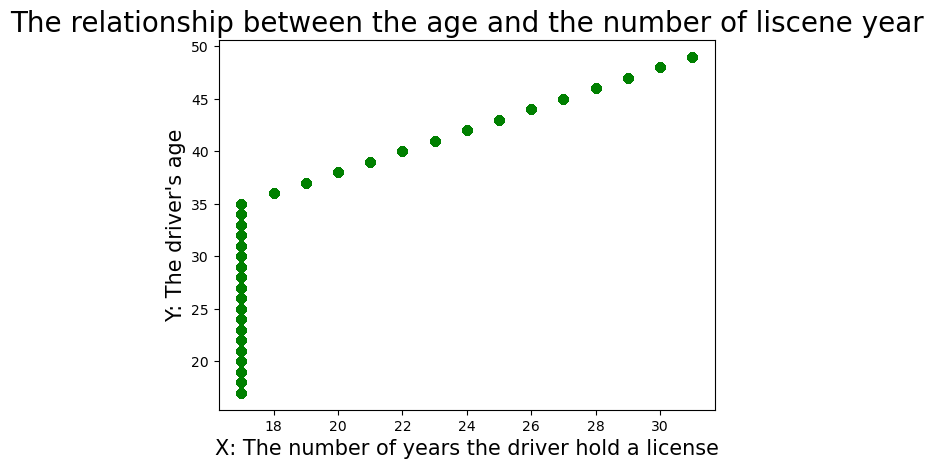

In [76]:
plt.figure()
plt.scatter(df_data_2["liscene_year"], df_data_2["age"], color = 'g')
plt.xlabel('X: The number of years the driver hold a license', fontsize = 15)
plt.ylabel("Y: The driver's age", fontsize = 15)
plt.title('The relationship between the age and the number of liscene year', fontsize = 20)
plt.show()

In [77]:
model = sm.OLS(df_data_2['age'], df_data_2[['intercept', 'liscene_year']])
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                 2.838e+04
Date:                Fri, 08 Mar 2024   Prob (F-statistic):               0.00
Time:                        10:27:40   Log-Likelihood:                -30052.
No. Observations:               10000   AIC:                         6.011e+04
Df Residuals:                    9998   BIC:                         6.012e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept       -3.3413      0.221    -15.086   

<div dir="rtl">

##### הקשר בין liscene_year ל- age הוא $R^2 = 0.739$

<div dir="rtl">

##### הקשר בין הגיל לבין מספר האנשים ברכב: 

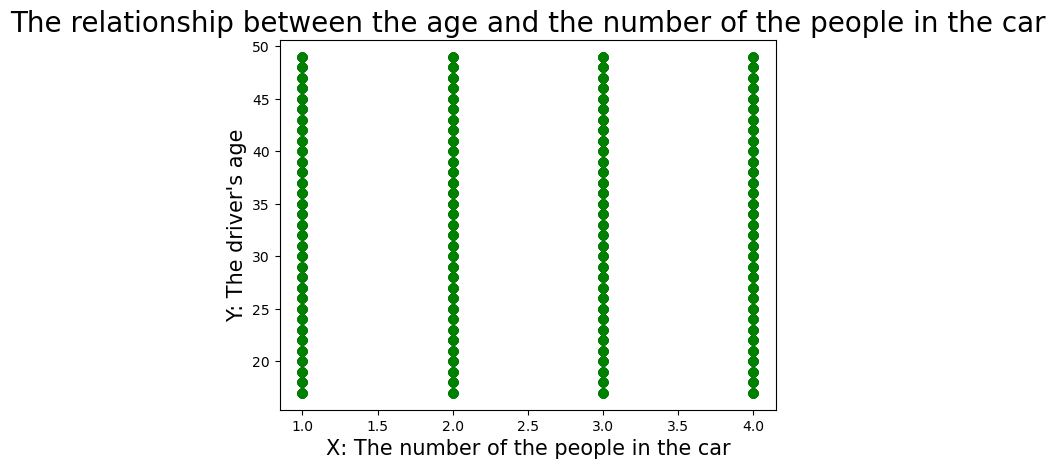

In [78]:
plt.figure()
plt.scatter(df_data_2["num_in_car"], df_data_2["age"], color = 'g')
plt.xlabel('X: The number of the people in the car', fontsize = 15)
plt.ylabel("Y: The driver's age", fontsize = 15)
plt.title('The relationship between the age and the number of the people in the car', fontsize = 20)
plt.show()

In [79]:
model = sm.OLS(df_data_2['age'], df_data_2[['intercept', 'num_in_car']])
results2 = model.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.02611
Date:                Fri, 08 Mar 2024   Prob (F-statistic):              0.872
Time:                        10:27:41   Log-Likelihood:                -36777.
No. Observations:               10000   AIC:                         7.356e+04
Df Residuals:                    9998   BIC:                         7.357e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     33.0865      0.236    140.494      0.0

<div dir="rtl">

##### הקשר בין age ל- num in car  הוא $R^2 = 0.00$

<div dir="rtl">

##### הקשר בין הגיל לבין אורך קטע הכביש:

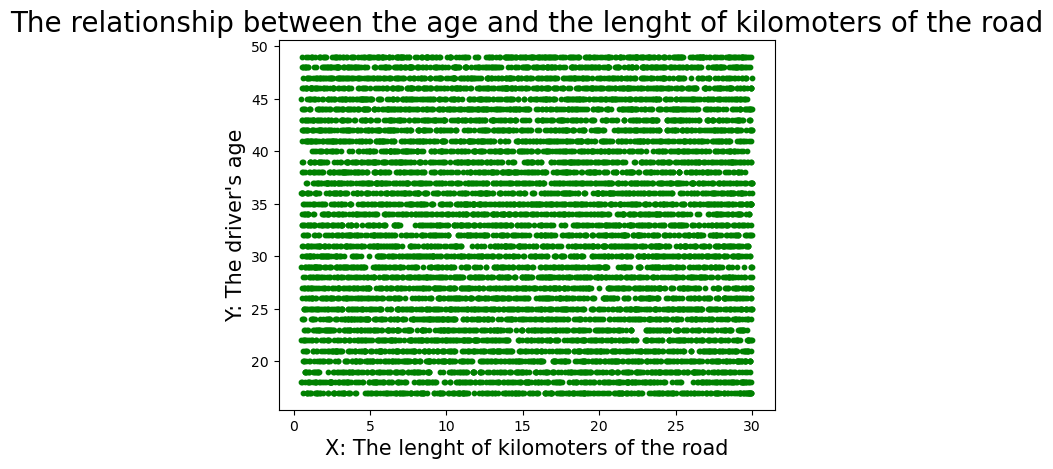

In [80]:
plt.figure()
plt.scatter(df_data_2["road_lenght"], df_data_2["age"], color = 'g', s=10)
plt.xlabel('X: The lenght of kilomoters of the road', fontsize = 15)
plt.ylabel("Y: The driver's age", fontsize = 15)
plt.title('The relationship between the age and the lenght of kilomoters of the road', fontsize = 20)
plt.show()

In [81]:
model = sm.OLS(df_data_2['age'], df_data_2[['intercept', 'road_lenght']])
results2 = model.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.166
Date:                Fri, 08 Mar 2024   Prob (F-statistic):              0.280
Time:                        10:27:41   Log-Likelihood:                -36777.
No. Observations:               10000   AIC:                         7.356e+04
Df Residuals:                    9998   BIC:                         7.357e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept      33.2351      0.195    170.519      

<div dir="rtl">

##### הקשר בין age ל- road lenght  הוא $R^2 = 0.00$

<div dir="rtl">

##### הקשר בין מספר שנים של רישיון לבין כמות האנשים ברכב:

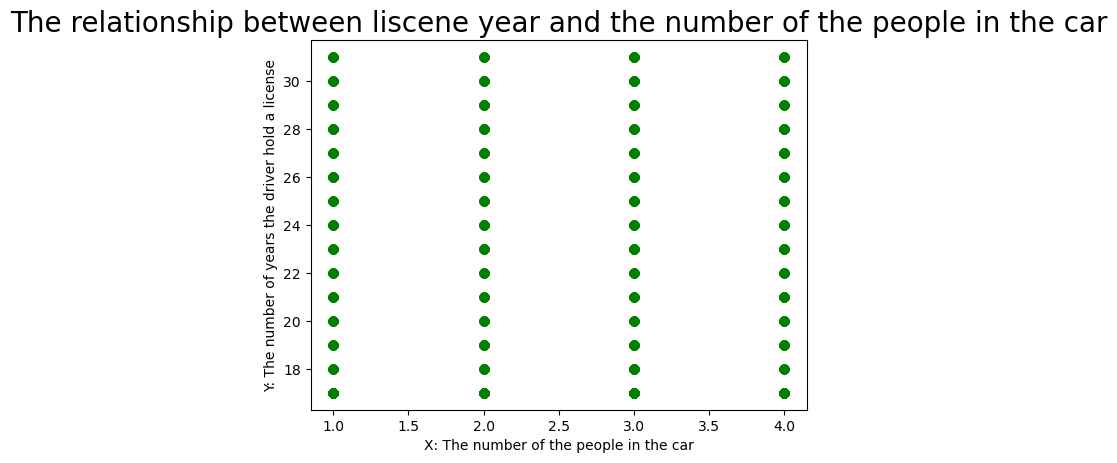

In [82]:
plt.figure()
plt.scatter(df_data_2["num_in_car"], df_data_2["liscene_year"], color = 'g')
plt.xlabel('X: The number of the people in the car', fontsize = 10)
plt.ylabel('Y: The number of years the driver hold a license', fontsize = 10)
plt.title('The relationship between liscene year and the number of the people in the car', fontsize = 20)
plt.show()

In [83]:
model = sm.OLS(df_data_2['liscene_year'], df_data_2[['intercept', 'num_in_car']])
results4 = model.fit()
print(results4.summary())

                            OLS Regression Results                            
Dep. Variable:           liscene_year   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.138
Date:                Fri, 08 Mar 2024   Prob (F-statistic):              0.286
Time:                        10:27:42   Log-Likelihood:                -29396.
No. Observations:               10000   AIC:                         5.880e+04
Df Residuals:                    9998   BIC:                         5.881e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     20.3396      0.113    180.690      0.0

<div dir="rtl">

##### הקשר בין liscene year ל- num in car הוא $R^2 = 0.00$

<div dir="rtl">

##### הקשר בין מספר שנים של רישיון לבין אורך קטע הכביש:

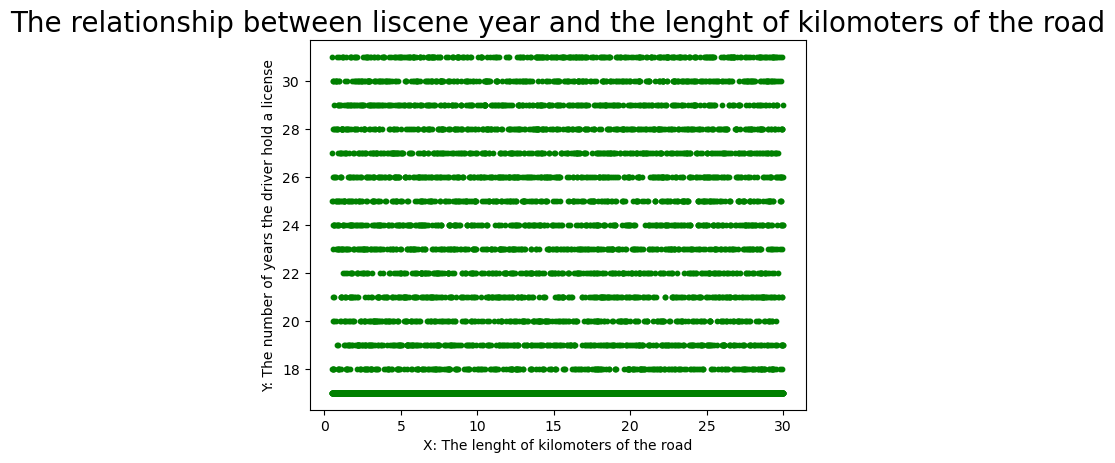

In [84]:
plt.figure()
plt.scatter(df_data_2["road_lenght"], df_data_2["liscene_year"], color = 'g', s=10)
plt.xlabel('X: The lenght of kilomoters of the road', fontsize = 10)
plt.ylabel('Y: The number of years the driver hold a license', fontsize = 10)
plt.title('The relationship between liscene year and the lenght of kilomoters of the road', fontsize = 20)
plt.show()

In [85]:
model = sm.OLS(df_data_2['liscene_year'], df_data_2[['intercept', 'road_lenght']])
results4 = model.fit()
print(results4.summary())

                            OLS Regression Results                            
Dep. Variable:           liscene_year   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3810
Date:                Fri, 08 Mar 2024   Prob (F-statistic):              0.537
Time:                        10:27:42   Log-Likelihood:                -29396.
No. Observations:               10000   AIC:                         5.880e+04
Df Residuals:                    9998   BIC:                         5.881e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept      20.2800      0.093    217.664      

<div dir="rtl">

##### הקשר בין liscene year ל- road lenght הוא $R^2 = 0.00$

<div dir="rtl">

##### הקשר בין אורך קטע הכביש לבין מספר האנשים ברכב:

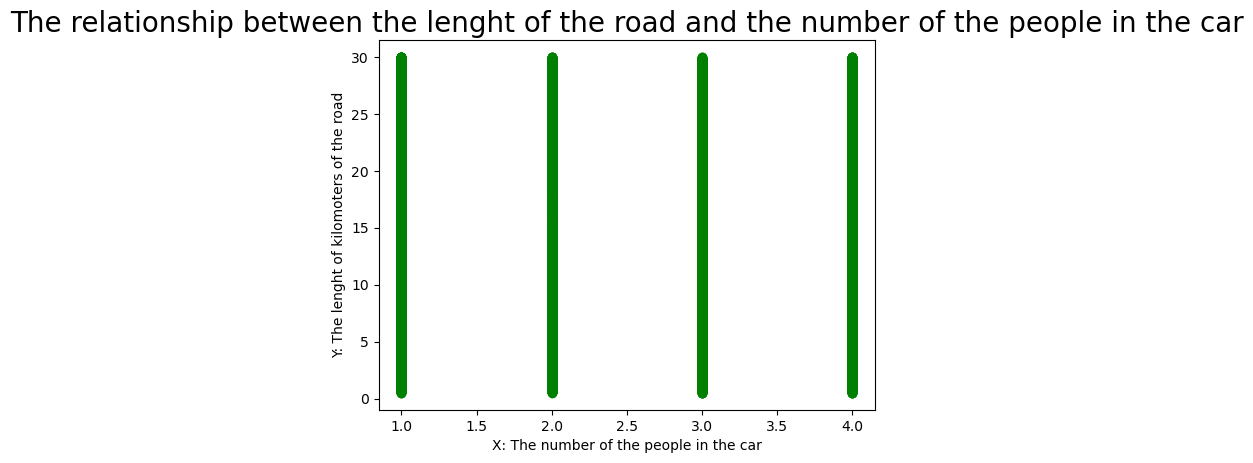

In [86]:
plt.figure()
plt.scatter(df_data_2["num_in_car"], df_data_2["road_lenght"], color = 'g')
plt.xlabel('X: The number of the people in the car', fontsize = 10)
plt.ylabel('Y: The lenght of kilomoters of the road', fontsize = 10)
plt.title('The relationship between the lenght of the road and the number of the people in the car', fontsize = 20)
plt.show()

In [87]:
model = sm.OLS(df_data_2['road_lenght'], df_data_2[['intercept', 'num_in_car']])
results4 = model.fit()
print(results4.summary())

                            OLS Regression Results                            
Dep. Variable:            road_lenght   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.489
Date:                Fri, 08 Mar 2024   Prob (F-statistic):              0.222
Time:                        10:27:43   Log-Likelihood:                -35657.
No. Observations:               10000   AIC:                         7.132e+04
Df Residuals:                    9998   BIC:                         7.133e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     15.4149      0.211     73.211      0.0

<div dir="rtl">

##### הקשר בין road lenght ל- num in car הוא $R^2 = 0.00$

In [88]:
feat = ['road_lenght','age','liscene_year','num_in_car']

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


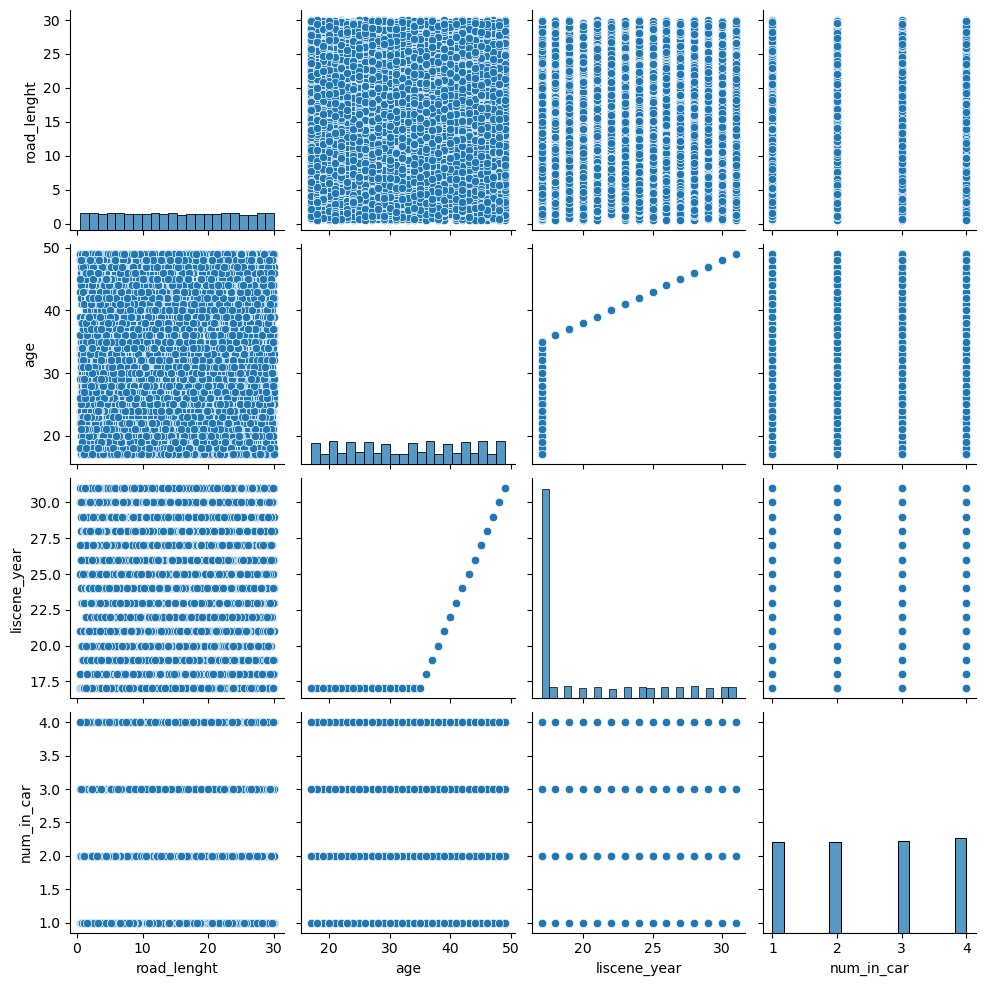

In [89]:
sns.pairplot(df_data_2[feat])
plt.show()

<div dir="rtl">

#### לסיכום: ישנו קשר חזק יחסית בין age ל-liscene year 

<div dir="rtl">

### 3.עבור משתנה קטגוריאלי אחד יש להציג bar chart של מספר נהגים שיכורים לק"מ בודד (בממוצע). איזו קבוצה הכי מועדת לפורענות?

In [90]:
df_data_2['drunk_drivers_km'] = df_data_2['drunk_driver']/df_data_2['road_lenght']
df_data_2['drunk_drivers_km']

0        5.281187
1       31.958067
2       22.594354
3        8.111341
4        5.982728
          ...    
9995     7.188863
9996    22.692116
9997    10.363483
9998     5.705162
9999     5.736125
Name: drunk_drivers_km, Length: 10000, dtype: float64

In [91]:
df_data_2.head()

,road_lenght,intercept,age,liscene_year,num_in_car,geneder__c,day_time_rand__c,drunk_driver,drunk_drivers_km
0,28.213353,1.0,21,17,4,male,morning,149,5.281187
1,5.319471,1.0,48,30,1,male,morning,170,31.958067
2,20.403327,1.0,43,25,1,male,night,461,22.594354
3,22.437722,1.0,35,17,4,male,morning,182,8.111341
4,23.233547,1.0,24,17,3,male,morning,139,5.982728


In [92]:
grouped = df_data_2.groupby('day_time_rand__c')['drunk_drivers_km'].mean()
grouped

day_time_rand__c
afternoon    14.040190
evening      14.055194
morning      12.362548
night        14.521819
Name: drunk_drivers_km, dtype: float64

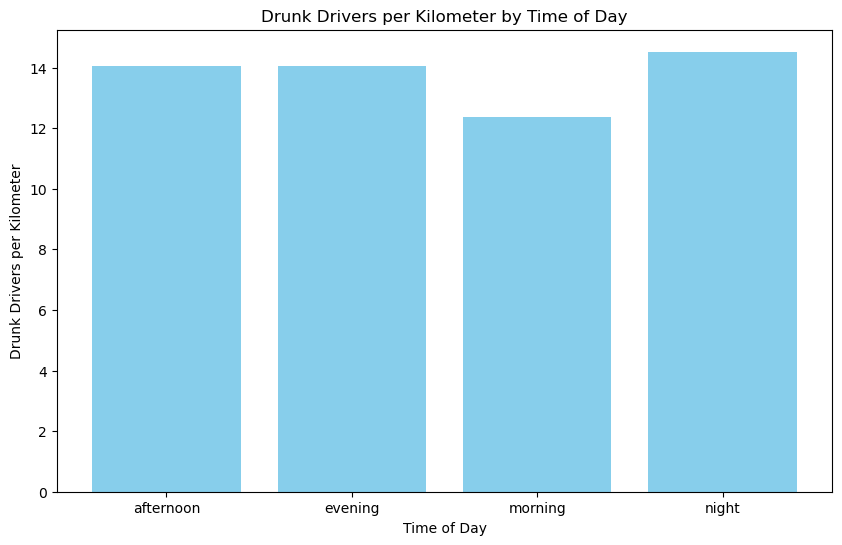

In [93]:
plt.figure(figsize=(10, 6))
plt.bar(grouped.index, grouped.values, color='skyblue')
plt.xlabel('Time of Day')
plt.ylabel('Drunk Drivers per Kilometer')
plt.title('Drunk Drivers per Kilometer by Time of Day')
plt.show()

<div dir="rtl">

#### ניתן לראות שהקבוצה שהכי מועדת לפורענות היא הקבוצה שנתפסו נוהגים בשכרות בלילה. נדגיש כי ההבדל בין אחה"צ, ערב ולילה הוא לא גדול מאוד...

<div dir="rtl">

### 4. רגרסיה ליניארית: נסו לחזות בעזרת רגרסיה ליניארית את מספר התאונות בקטע כביש.

In [94]:
df_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   road_lenght       10000 non-null  float64
 1   intercept         10000 non-null  float64
 2   age               10000 non-null  int32  
 3   liscene_year      10000 non-null  int32  
 4   num_in_car        10000 non-null  int32  
 5   geneder__c        10000 non-null  object 
 6   day_time_rand__c  10000 non-null  object 
 7   drunk_driver      10000 non-null  int32  
 8   drunk_drivers_km  10000 non-null  float64
dtypes: float64(3), int32(4), object(2)
memory usage: 547.0+ KB


In [95]:
df_dummies = pd.get_dummies(df_data_2[['geneder__c', 'day_time_rand__c']], drop_first = True, dtype = int)
df_dummies.head()

,geneder__c_male,day_time_rand__c_evening,day_time_rand__c_morning,day_time_rand__c_night
0,1,0,1,0
1,1,0,1,0
2,1,0,0,1
3,1,0,1,0
4,1,0,1,0


In [96]:
df_data_and_dummies = pd.concat([df_data_2, df_dummies], axis=1)

In [97]:
X = df_data_and_dummies.drop(['drunk_driver','geneder__c', 'day_time_rand__c','drunk_drivers_km'], axis=1)
y = df_data_and_dummies['drunk_driver']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           drunk_driver   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     5270.
Date:                Fri, 08 Mar 2024   Prob (F-statistic):               0.00
Time:                        10:27:54   Log-Likelihood:                -58968.
No. Observations:               10000   AIC:                         1.180e+05
Df Residuals:                    9991   BIC:                         1.180e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
road_lenght             

In [98]:
df_p_2 = pd.DataFrame(results.pvalues, columns = ['pval'])
df_p_2['vars'] = df_p_2.index
df_p_2 = df_p_2.reset_index()
var_cols = []
for var in df_p_2['vars']:
    if df_p_2.loc[df_p_2['vars']==var, 'pval'].item() < 0.05:
        var_cols.append(var)
X_2 = df_data_and_dummies[var_cols]
y_2 = df_data_and_dummies['drunk_driver']

logit_model=sm.OLS(y_2,X_2)
results_2=logit_model.fit()
print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:           drunk_driver   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     8429.
Date:                Fri, 08 Mar 2024   Prob (F-statistic):               0.00
Time:                        10:27:54   Log-Likelihood:                -58970.
No. Observations:               10000   AIC:                         1.180e+05
Df Residuals:                    9994   BIC:                         1.180e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
road_lenght             

In [99]:
predictions = results_2.predict(X_2)
prediction_count = 0

for i, i_road_lenght in enumerate(df_data_and_dummies['road_lenght']):
    print("Prediction for road segment", i_road_lenght, ":", predictions[i])
    prediction_count += 1
    if prediction_count == 5:
        break

Prediction for road segment 28.213352843770398 : 260.6889760936299
Prediction for road segment 5.319470664280159 : 346.3121091819197
Prediction for road segment 20.4033274792266 : 439.15162829963225
Prediction for road segment 22.43772155477253 : 190.69341349108697
Prediction for road segment 23.233547138110787 : 195.02713870818968


In [100]:
X_2_new = X_2.drop(columns = "intercept")

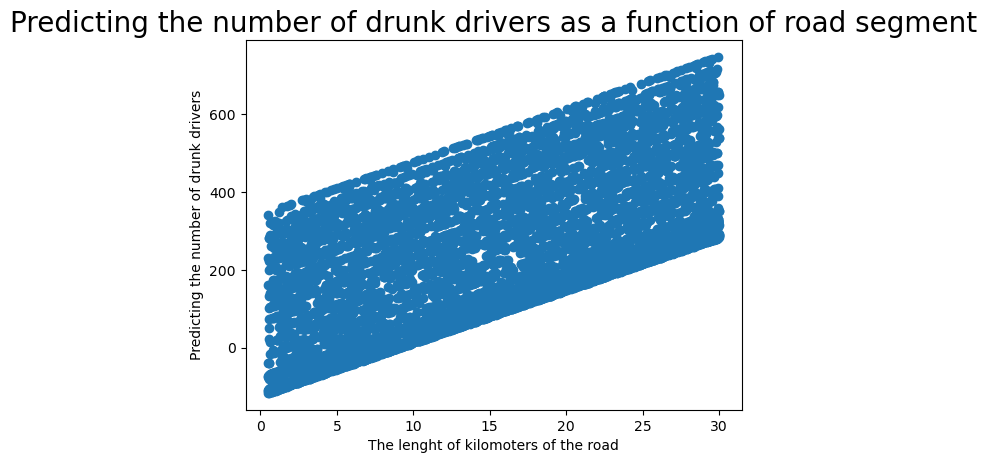

In [101]:
plt.figure()
plt.title('Predicting the number of drunk drivers as a function of road segment', fontsize= 20)
plt.xlabel('The lenght of kilomoters of the road', fontsize= 10)
plt.ylabel('Predicting the number of drunk drivers', fontsize= 10)
plt.scatter(df_data_and_dummies['road_lenght'], results_2.predict(X_2))
plt.show()

<div dir="rtl">

### 5. נא לבדוק את הנחות המודל - אילו הנחות הופרו?

<div dir="rtl">

#### הנחות המודל שצריך לבדוק הן:
#### 1. ליניאריות: ישנו קשר לינארי בין המשתנה המסביר למשתנה המוסבר
#### 2. שונות קבועה: ניתן לראות כי השונות סביב קו הרגרסיה היא קבועה
#### 3. התפלגות נורמאלית של השגיאות
    
#### לינאריות אין ביכולתנו לבדוק מפני שאי אפשר להראות גרף עם יותר משני משתנים מסבירים (גרף תלת מימדי) ולכן לא נבצע בדיקה על הנחה זו.

In [102]:
df_data_and_dummies['resid']= results_2.predict(X_2) - df_data_and_dummies['drunk_driver']

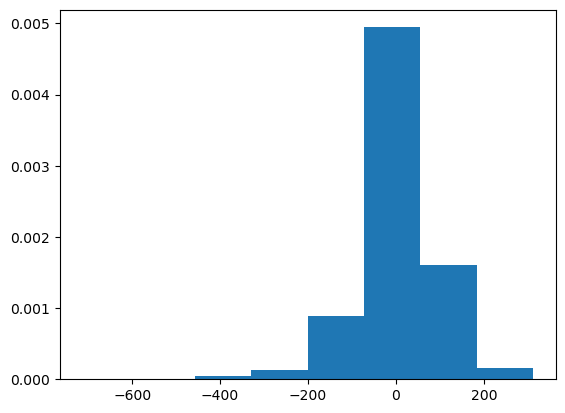

In [103]:
plt.figure()
plt.hist(df_data_and_dummies['resid'], bins = 8, density = True)
plt.show()

<div dir="rtl">

#### ניתן לראות שאין התפלגות נורמאלית של השגיאות

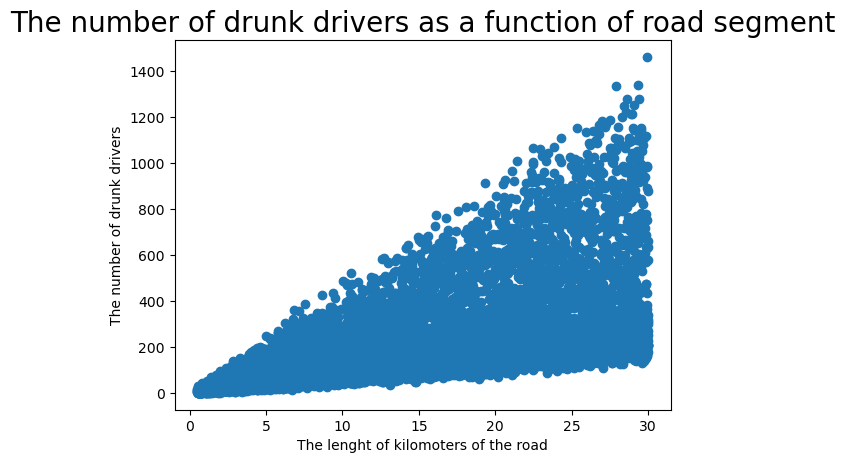

In [104]:
plt.figure()
plt.scatter(df_data_and_dummies['road_lenght'], df_data_and_dummies['drunk_driver'])
plt.title('The number of drunk drivers as a function of road segment', fontsize= 20)
plt.xlabel('The lenght of kilomoters of the road', fontsize= 10)
plt.ylabel('The number of drunk drivers', fontsize= 10)
plt.show()

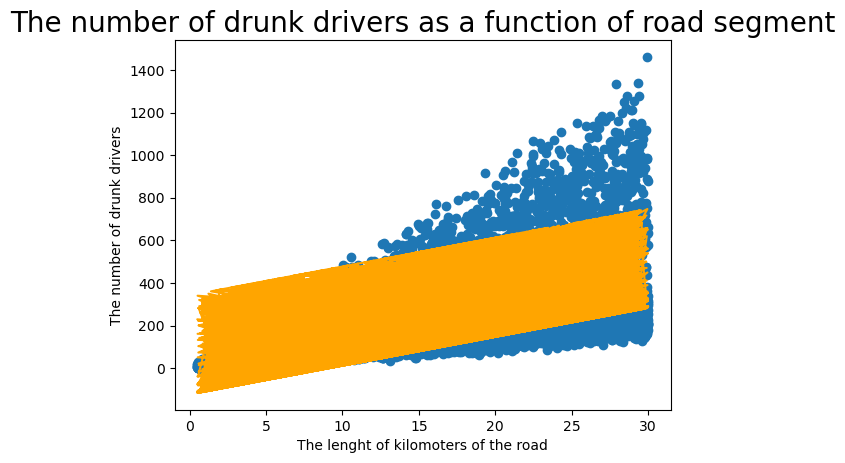

In [105]:
plt.figure()
plt.scatter(df_data_and_dummies['road_lenght'], df_data_and_dummies['drunk_driver'])
plt.plot(df_data_and_dummies['road_lenght'], results_2.fittedvalues, color = 'orange')
plt.title('The number of drunk drivers as a function of road segment', fontsize= 20)
plt.xlabel('The lenght of kilomoters of the road', fontsize= 10)
plt.ylabel('The number of drunk drivers', fontsize= 10)
plt.show()

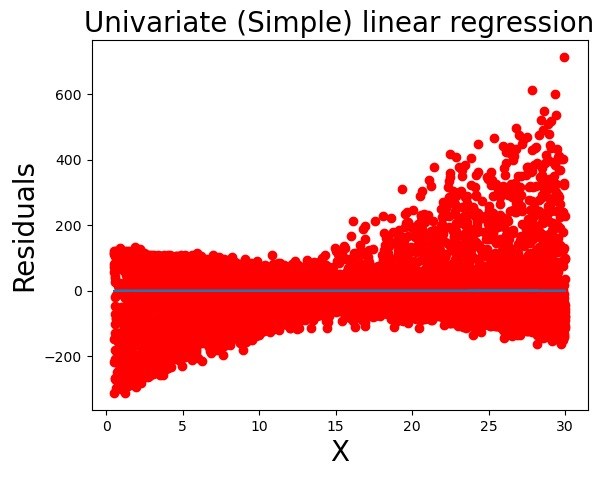

In [106]:
plt.figure()
plt.scatter(df_data_and_dummies['road_lenght'], df_data_and_dummies['drunk_driver'] - results_2.predict(X_2), color = 'r')
plt.plot(df_data_and_dummies['road_lenght'], np.zeros(df_data_and_dummies['road_lenght'].shape[0]))
plt.xlabel('X', fontsize = 20)
plt.ylabel('Residuals', fontsize = 20)
plt.title('Univariate (Simple) linear regression', fontsize = 20)
plt.show()

<div dir="rtl">

#### ניתן לראות שהשונות הולכת וגדלה וכאשר בודקים סביב קו הרגרסיה רואים כי היא אינה קבועה

<div dir="rtl">

### 6. יש כעת לעשות רגרסיה פואסונית -נא להוציא משתנים לא מובהקים

In [107]:
model_poisson = sm.GLM(
    y,
    X.drop(columns=["road_lenght"]),
    offset=np.log(df_data_and_dummies['road_lenght']),
    family=sm.families.Poisson(),
)
results_poisson_1 = model_poisson.fit()
print(results_poisson_1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           drunk_driver   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9992
Model Family:                 Poisson   Df Model:                            7
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -50032.
Date:                Fri, 08 Mar 2024   Deviance:                       33155.
Time:                        10:27:57   Pearson chi2:                 3.32e+04
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
intercept               

In [108]:
df_p_2 = pd.DataFrame(results.pvalues, columns = ['pval'])
df_p_2['vars'] = df_p_2.index
df_p_2 = df_p_2.reset_index()
var_cols = []
for var in df_p_2['vars']:
    if df_p_2.loc[df_p_2['vars']==var, 'pval'].item() < 0.05:
        var_cols.append(var)
X_2_poiss = df_data_and_dummies[var_cols]
y_2_poiss = df_data_and_dummies['drunk_driver']

model_poisson = sm.GLM(
    y_2_poiss,
    X_2_poiss.drop(columns=["road_lenght"]),
    offset=np.log(df_data_and_dummies['road_lenght']),
    family=sm.families.Poisson(),
)
results_poisson = model_poisson.fit()
print(results_poisson.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           drunk_driver   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9995
Model Family:                 Poisson   Df Model:                            4
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -50075.
Date:                Fri, 08 Mar 2024   Deviance:                       33241.
Time:                        10:27:58   Pearson chi2:                 3.33e+04
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
intercept               

<div dir="rtl">

### 7. האם רגריסה פואוסנית מתאימה כאן? נמק.י יש לבדוק -4 דרכים שונות

<div dir="rtl">

#### נבדוק הנחה ראשונה שצריכה להתקיים: התוחלת שווה לשונות במשתנה מקרי פואסוני 

In [109]:
df_data_and_dummies['rates'] = results_poisson.fittedvalues

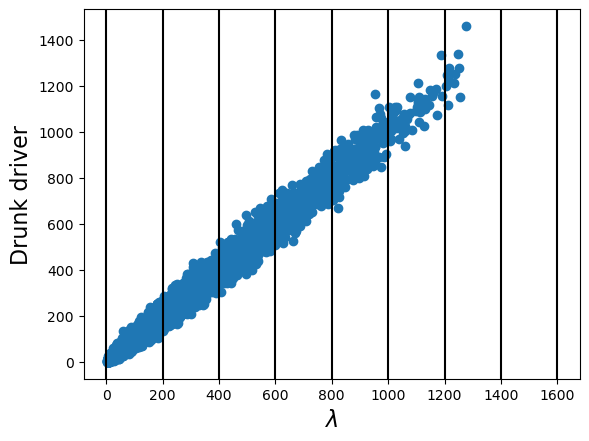

In [110]:
plt.figure()
plt.scatter(df_data_and_dummies['rates'], df_data_and_dummies['drunk_driver'])
plt.xlabel('$\lambda$', fontsize=16)
plt.ylabel('Drunk driver', fontsize = 16)
for x_val in np.linspace(0,1600, 9):
    plt.axvline(x=x_val, color= 'black')
plt.show()

In [111]:
df_data_and_dummies.head()

,road_lenght,intercept,age,liscene_year,num_in_car,geneder__c,day_time_rand__c,drunk_driver,drunk_drivers_km,geneder__c_male,day_time_rand__c_evening,day_time_rand__c_morning,day_time_rand__c_night,resid,rates
0,28.213353,1.0,21,17,4,male,morning,149,5.281187,1,0,1,0,111.688976,171.457309
1,5.319471,1.0,48,30,1,male,morning,170,31.958067,1,0,1,0,176.312109,170.317975
2,20.403327,1.0,43,25,1,male,night,461,22.594354,1,0,0,1,-21.848372,460.035275
3,22.437722,1.0,35,17,4,male,morning,182,8.111341,1,0,1,0,8.693413,181.404798
4,23.233547,1.0,24,17,3,male,morning,139,5.982728,1,0,1,0,56.027139,150.100295


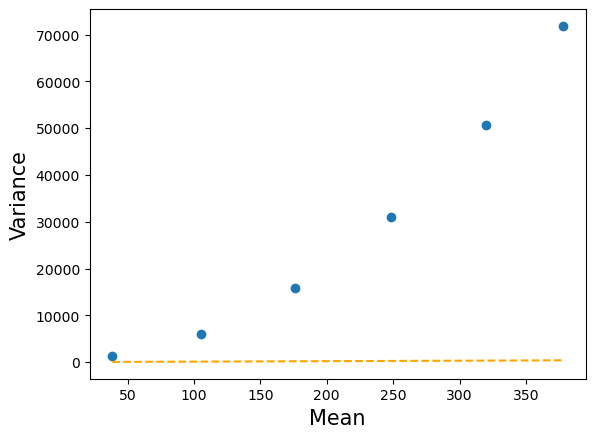

In [112]:
lams = np.linspace(0,100, 20)

means = []
vars_ = []

for lams_ind in range(lams.shape[0]-1):
    
    lb = lams[lams_ind]
    ub = lams[lams_ind+1]
        
    shape = df_data_and_dummies.loc[(df_data_and_dummies['road_lenght']>lb)& (df_data_and_dummies['road_lenght']<ub), 'drunk_driver'].shape
    var = df_data_and_dummies.loc[(df_data_and_dummies['road_lenght']>lb)& (df_data_and_dummies['road_lenght']<ub), 'drunk_driver'].std()**2
    mean = df_data_and_dummies.loc[(df_data_and_dummies['road_lenght']>lb)& (df_data_and_dummies['road_lenght']<ub), 'drunk_driver'].mean()
    
    if shape[0] > 15:
        means.append(mean)
        vars_.append(var)
    
plt.figure()
plt.scatter(means, vars_)
plt.plot(means, means, '--', label='y = x', color = 'orange')
plt.xlabel('Mean', fontsize = 15)
plt.ylabel('Variance', fontsize = 15)
plt.show()

<div dir="rtl">

##### ניתן לראות כי השונות לא שווה לתוחלת.

<div dir="rtl">

#### מבחן השערות על כך שהשגיאות מפולגות פואסון:
#### ניתן לעשות מבחן שנקרא chi square על מנת לבדוק האם ההתפלגות של השגיאות מפולגים פואסונית.

In [113]:
results_poisson.pearson_chi2

33252.923852875305

In [114]:
results_poisson.df_resid

9995

In [115]:
R = results_poisson.pearson_chi2/results_poisson.df_resid
print(R) 

3.32695586321914


In [116]:
df1 = results_poisson.df_resid
p_value = 1 - chi2.cdf(results_poisson.pearson_chi2, df1)

print("Pearson Chi-Square Test p-value:", p_value)

Pearson Chi-Square Test p-value: 0.0


<div dir="rtl">

##### ערך ה-p המתקבל ממבחן החי בריבוע של פירסון הוא נמוך ביותר (p-value = 0.0), שהוא פחות מרמת המובהקות המקובלת של 0.05. 
##### לכן, נדחה את השערת האפס והשגיאות לא מתפלגות פואסונית.

<div dir="rtl">

#### Overdispersion parameter: מדד המראה לנו את היחס בין התוחלת לשונות - כאשר נרצה שיהיה כמה שיותר קרוב ל-1.

In [117]:
R = results_poisson.pearson_chi2 / results_poisson.df_resid
print(R) 

3.32695586321914


<div dir="rtl">

##### ניתן לראות כי המספר גדול מ- 1 ועל כן הנחה זו אינה מתממשת

<div dir="rtl">

#### נבדוק האם השגיאות מפולגות פואסונית
#### נעשה זאת על ידי הבדיקה הבאה נראה כי כ95 אחוז מהשגיאות נמצאות +-2 סטיות תקן מהתוחלת

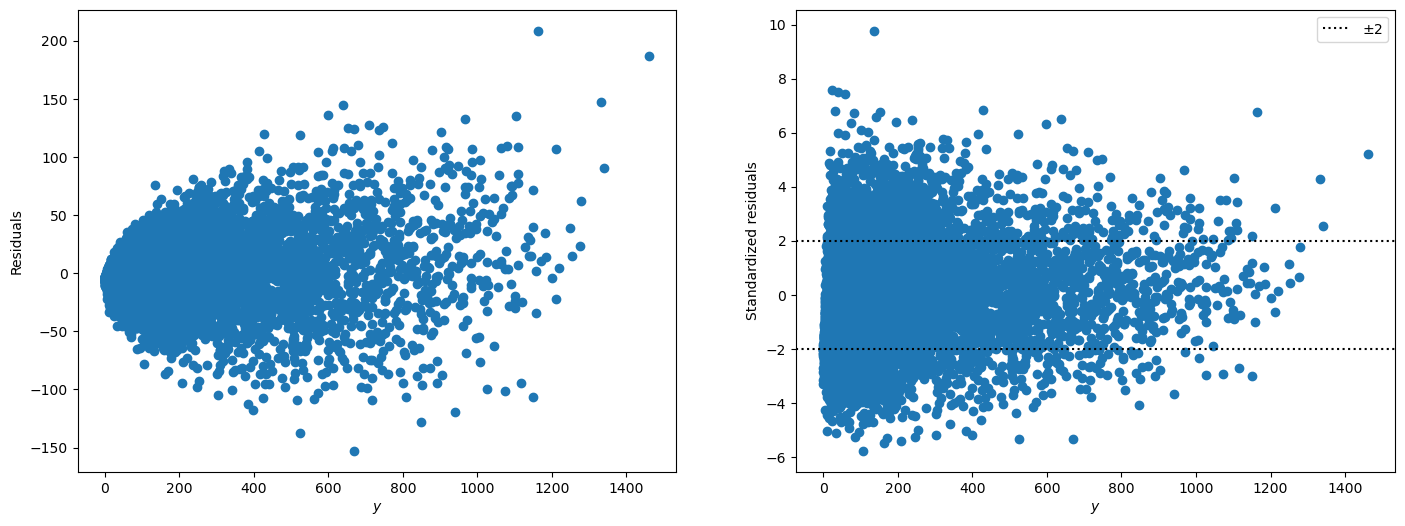

In [118]:
f, axes = plt.subplots(1, 2, figsize=(17, 6))
axes[0].scatter(df_data_and_dummies['drunk_driver'], results_poisson.resid_response)
axes[0].set_ylabel("Residuals")
axes[0].set_xlabel("$y$")
axes[1].scatter(df_data_and_dummies['drunk_driver'], results_poisson.resid_pearson)
axes[1].axhline(y=-2, linestyle=':', color='black', label='$\pm 2$')
axes[1].axhline(y=+2, linestyle=':', color='black')
axes[1].set_ylabel("Standardized residuals")
axes[1].set_xlabel("$y$")
plt.legend()
plt.show()

<div dir="rtl">

##### הנחה זו אינה נכונה במקרה שלנו מפני שאנו רואים ש-95% מהשגיאות נמצא מחוץ ל 2+- סטיות תקן מהתוחלת.

<div dir="rtl">

### 8. אם בסעיף 7 התשובה הייתה לא, נא לעשות רגרסיה בינומית שלילית ולבדוק אם היא מתאימה כאן.
###  אם בסעיף 7 התשובה הייתה כן נא לחשב את הIRR של אחד המשתנים הרציפים ולהסביר מה המשמעות שלו במונחים של מספר נהגים שיכורים

In [119]:
nb = NegativeBinomial(
    y,
    X,
    offset=np.log(X["road_lenght"]),
)

result = nb.fit()
print(pd.DataFrame(result.params).loc['alpha',:])

Optimization terminated successfully.
         Current function value: 4.538225
         Iterations: 25
         Function evaluations: 36
         Gradient evaluations: 36
0    0.01417
Name: alpha, dtype: float64


In [120]:
alpha = 0.01417
model_NB = sm.GLM(
    y,
    X.drop(columns=["road_lenght"]),
    offset=np.log(X["road_lenght"]),
    family=sm.families.NegativeBinomial(alpha=alpha),
)

result_NB = model_NB.fit()
print(result_NB.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           drunk_driver   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9992
Model Family:        NegativeBinomial   Df Model:                            7
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -45383.
Date:                Fri, 08 Mar 2024   Deviance:                       12256.
Time:                        10:28:01   Pearson chi2:                 1.22e+04
No. Iterations:                     6   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
intercept               

In [121]:
df_p_2 = pd.DataFrame(results.pvalues, columns = ['pval'])
df_p_2['vars'] = df_p_2.index
df_p_2 = df_p_2.reset_index()
var_cols = []
for var in df_p_2['vars']:
    if df_p_2.loc[df_p_2['vars']==var, 'pval'].item() < 0.05:
        var_cols.append(var)
X_2_BN = df_data_and_dummies[var_cols]
y_2_BN = df_data_and_dummies['drunk_driver']

alpha = 0.01417
model_NB_2 = sm.GLM(
    y_2_BN,
    X_2_BN.drop(columns=["road_lenght"]),
    offset=np.log(X["road_lenght"]),
    family=sm.families.NegativeBinomial(alpha=alpha),
)

result_NB_2 = model_NB_2.fit()
print(result_NB_2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           drunk_driver   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9995
Model Family:        NegativeBinomial   Df Model:                            4
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -45396.
Date:                Fri, 08 Mar 2024   Deviance:                       12283.
Time:                        10:28:01   Pearson chi2:                 1.22e+04
No. Iterations:                     6   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
intercept               

<div dir="rtl">

### Overdispersion parameter:

In [122]:
R = result_NB_2.pearson_chi2 / result_NB_2.df_resid
print(R) 

1.2224505243047183


<div dir="rtl">

#### אכן קרוב ל-1, הרבה יותר טוב מהמצב הקודם

<div dir="rtl">

### נבדוק את התפלגות השגיאות:

In [123]:
NB_arr = result_NB_2.resid_pearson

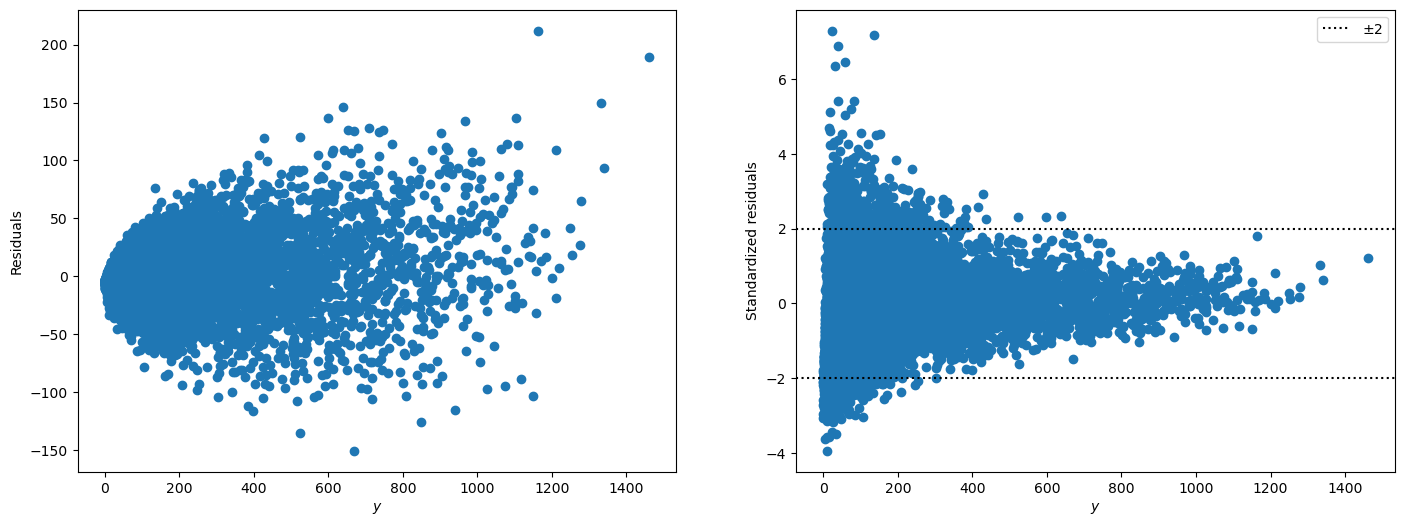

In [124]:
f, axes = plt.subplots(1, 2, figsize=(17, 6))
axes[0].plot(y_2_BN, result_NB_2.resid_response, 'o')
axes[0].set_ylabel("Residuals")
axes[0].set_xlabel("$y$")
axes[1].plot(y_2_BN, result_NB_2.resid_pearson, 'o')
axes[1].axhline(y=-2, linestyle=':', color='black', label='$\pm 2$')
axes[1].axhline(y=+2, linestyle=':', color='black')
axes[1].set_ylabel("Standardized residuals")
axes[1].set_xlabel("$y$")
plt.legend()
plt.show()

<div dir="rtl">

#### הנחה זו נכונה מפני שאנו רואים ש-95% מהשגיאות נמצא בין 2+- סטיות תקן מהתוחלת.

<div dir="rtl">

### 9. predictions: יש להוציא גרף תלת מימדי של תחזית מספר הנהגים הממוצע כפונקציה של שני משתנים רציפים שנכנסו למודל. עבור שאר המשתנים הקטגוריאלים נזין את הערך 0. יש לפלוט באותו גרף שני מישורים כאשר אחד מדווח על האורך כביש של 1 ק"מ ואילו השני מדווח על כביש באורך 5 ק"מ. האם יש הבדל ניכר בין המישורים שקיבלתם, האם ניתן להסביר מבחינה הגיונית את התוצאה?  

In [125]:
alpha = 0.01417
model_NB_2 = sm.GLM(
    y_2_BN,
    X_2_BN.drop(columns=["road_lenght"]),
    offset=np.log(X["road_lenght"]),
    family=sm.families.NegativeBinomial(alpha=alpha),
)

result_NB_2 = model_NB_2.fit()
print(result_NB_2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           drunk_driver   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9995
Model Family:        NegativeBinomial   Df Model:                            4
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -45396.
Date:                Fri, 08 Mar 2024   Deviance:                       12283.
Time:                        10:28:03   Pearson chi2:                 1.22e+04
No. Iterations:                     6   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
intercept               

In [126]:
def BN_surface_eq(age,liscene_year):
    return  0.0205*age + 0.0851*liscene_year

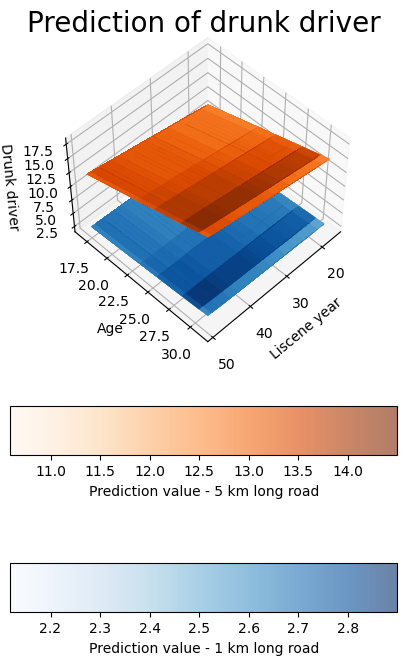

In [127]:
X1_age, Y1_liscene_year = np.meshgrid(df_data_and_dummies['age'], df_data_and_dummies['liscene_year'])
Z1_pred = BN_surface_eq(X1_age, Y1_liscene_year)*1

X2_age, Y2_liscene_year = np.meshgrid(df_data_and_dummies['age'], df_data_and_dummies['liscene_year'])
Z2_pred = BN_surface_eq(X2_age, Y2_liscene_year)*5

fig = plt.figure(figsize = (10,8))
ax = plt.axes(projection='3d')

surf1 = ax.plot_surface(X1_age, Y1_liscene_year, Z1_pred, cmap = plt.cm.Blues, alpha = 0.6)
surf2 = ax.plot_surface(X2_age, Y2_liscene_year, Z2_pred, cmap = plt.cm.Oranges, alpha = 0.6)

ax.set_xlabel('Liscene year',fontsize = 10)
ax.set_ylabel('Age',fontsize = 10)
ax.set_zlabel('Drunk driver',fontsize = 10)
plt.title('Prediction of drunk driver' ,fontsize = 20)
fig.colorbar(surf1, shrink=0.5, aspect=8, label='Prediction value - 1 km long road', orientation='horizontal')
fig.colorbar(surf2, shrink=0.5, aspect=8, label='Prediction value - 5 km long road', orientation='horizontal')
ax.view_init(elev=50., azim=45)
plt.show()

<div dir="rtl">

#### לפי הגרף ניתן לראות כי יש הבדל ניכר בין המשטחים שקיבלנו. 
#### המשטח שמנבא מספר נהגים שיכורים עבור קילומטר בודד הינו נמוך בהבדל גדול לעומת המשטח שמנבא נהגים שיכורים עבור 5 קילומטרים של אורך כביש.
#### כמובן שמבחינה הגיונית ניתן להסיק זאת, מפני שבתוך טווח של 5 קילומטרים בקטע כביש מסויים יש יותר סיכוי לנהגים שיכורים מאשר בטווח קטן יותר שהוא 1 קילומטר...

<div dir="rtl">

## הערות
### יש להגיש קובץ pdf עם כל התשובות והגרפים יחד עם הקוד שבו חישבתם את הכל. יש לכווץ את שני הקבצים לקובץ zip בודד ולהגיש למודל.
### כל הגרפים צריכים להיות ברורים, עם שמות לצירים בפונט גדול וברור. אם יש יותר מעקומה או קבוצה (רלוונטי לbar charts ) אחת בגרף חובה להוסיף legend.
    
    